<a href="https://colab.research.google.com/github/shinbad/net_project/blob/main/Attack_feature_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pip install kaggle --upgrade

In [ ]:
!kaggle datasets download -d aryashah2k/nfuqnidsv2-network-intrusion-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/nfuqnidsv2-network-intrusion-detection-dataset
License(s): CC0-1.0
 99% 2.02G/2.04G [00:23<00:00, 133MB/s]
100% 2.04G/2.04G [00:23<00:00, 92.9MB/s]


In [ ]:
!unzip nfuqnidsv2-network-intrusion-detection-dataset

Archive:  nfuqnidsv2-network-intrusion-detection-dataset.zip
  inflating: NF-UQ-NIDS-v2.csv       


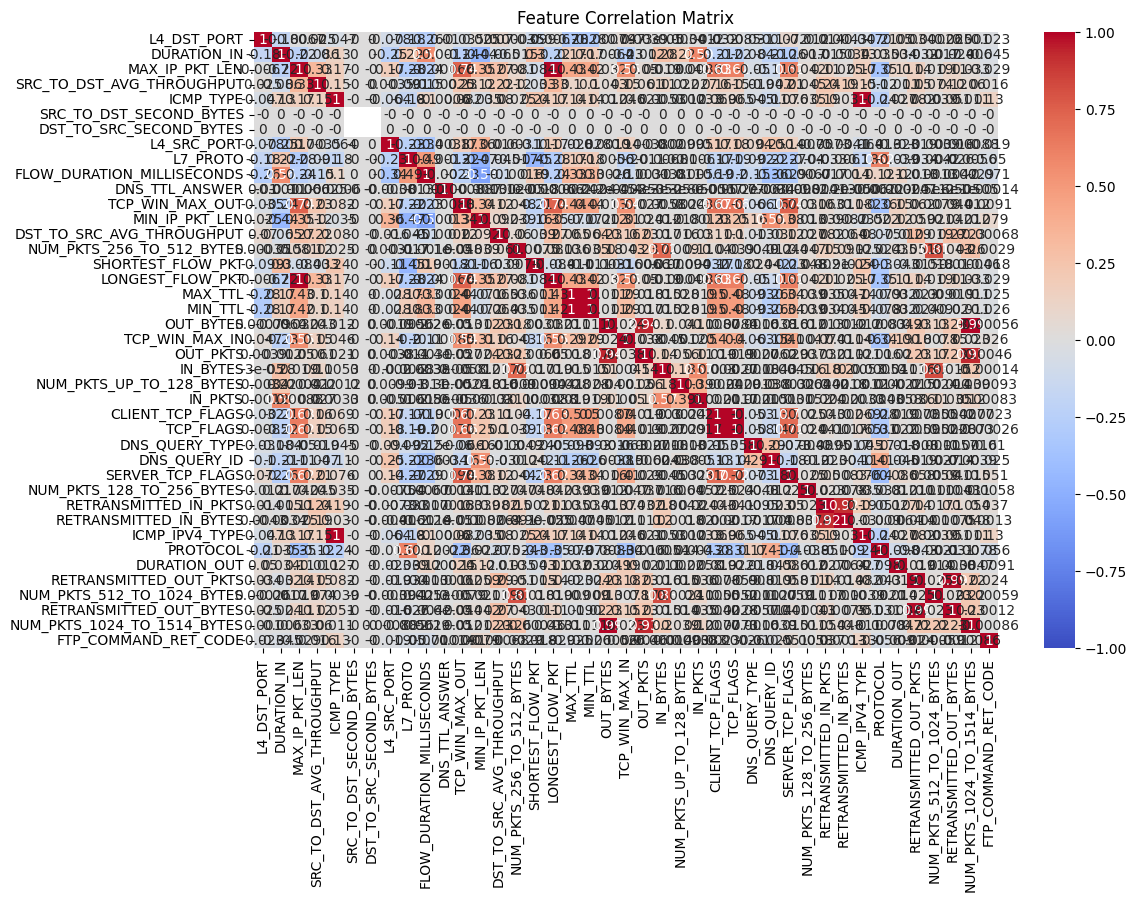

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 로드 (예시로 CSV 파일 사용)
df = pd.read_csv('/content/NF-UQ-NIDS-v2.csv',index_col=False, nrows=1)
cols = df.columns
df = pd.read_csv("/content/NF-UQ-NIDS-v2.csv", header=None, names=cols, skiprows=1, nrows=1000000, index_col=False)

# 선택된 주요 특징들
features = [
	'L4_SRC_PORT', 'L7_PROTO', 'FLOW_DURATION_MILLISECONDS', 'LONGEST_FLOW_PKT',
    'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'DST_TO_SRC_AVG_THROUGHPUT',
    'NUM_PKTS_256_TO_512_BYTES', 'TCP_WIN_MAX_OUT', 'DNS_TTL_ANSWER'
]

# 상관관계 매트릭스 계산
correlation_matrix = df[features].corr()

# 상관관계 매트릭스 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋 로드
df = pd.read_csv("/content/NF-UQ-NIDS-v2.csv", header=None, names=cols, skiprows=1, nrows=1000000, index_col=False)

# NaN 및 inf 값 처리
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# 선택된 주요 특징들
features = [
    'L4_SRC_PORT', 'L7_PROTO', 'FLOW_DURATION_MILLISECONDS', 'LONGEST_FLOW_PKT',
    'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'DST_TO_SRC_AVG_THROUGHPUT',
    'NUM_PKTS_256_TO_512_BYTES', 'TCP_WIN_MAX_OUT', 'DNS_TTL_ANSWER'
]

# 특징과 레이블 설정
X = df[features]
y = df['Label']

# 데이터셋 분리
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier()
model.fit(X_train_1, y_train_1)

# 특징 중요도 추출
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# 중요도 순위별 특징
important_features = [features[i] for i in indices]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier()
model.fit(X_train_1, y_train_1)

# 특징 중요도 추출
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# 중요도 순위별 특징
important_features = [features[i] for i in indices]

# 중요도 표 생성
importance_df = pd.DataFrame({'Feature': important_features, 'Importance': importances[indices]})
print(importance_df)

                      Feature  Importance
0                    L7_PROTO    0.224909
1  FLOW_DURATION_MILLISECONDS    0.192883
2   DST_TO_SRC_AVG_THROUGHPUT    0.154087
3                 L4_SRC_PORT    0.108969
4            LONGEST_FLOW_PKT    0.103815
5              MIN_IP_PKT_LEN    0.065598
6           SHORTEST_FLOW_PKT    0.057934
7             TCP_WIN_MAX_OUT    0.051704
8              DNS_TTL_ANSWER    0.031138
9   NUM_PKTS_256_TO_512_BYTES    0.008963


In [ ]:
attack_types = df['Attack'].unique()  # 'Attack' 컬럼이 공격 유형을 나타낸다고 가정

# 각 공격 유형별 데이터 저장
attack_data = {attack: df[df['Attack'] == attack] for attack in attack_types}

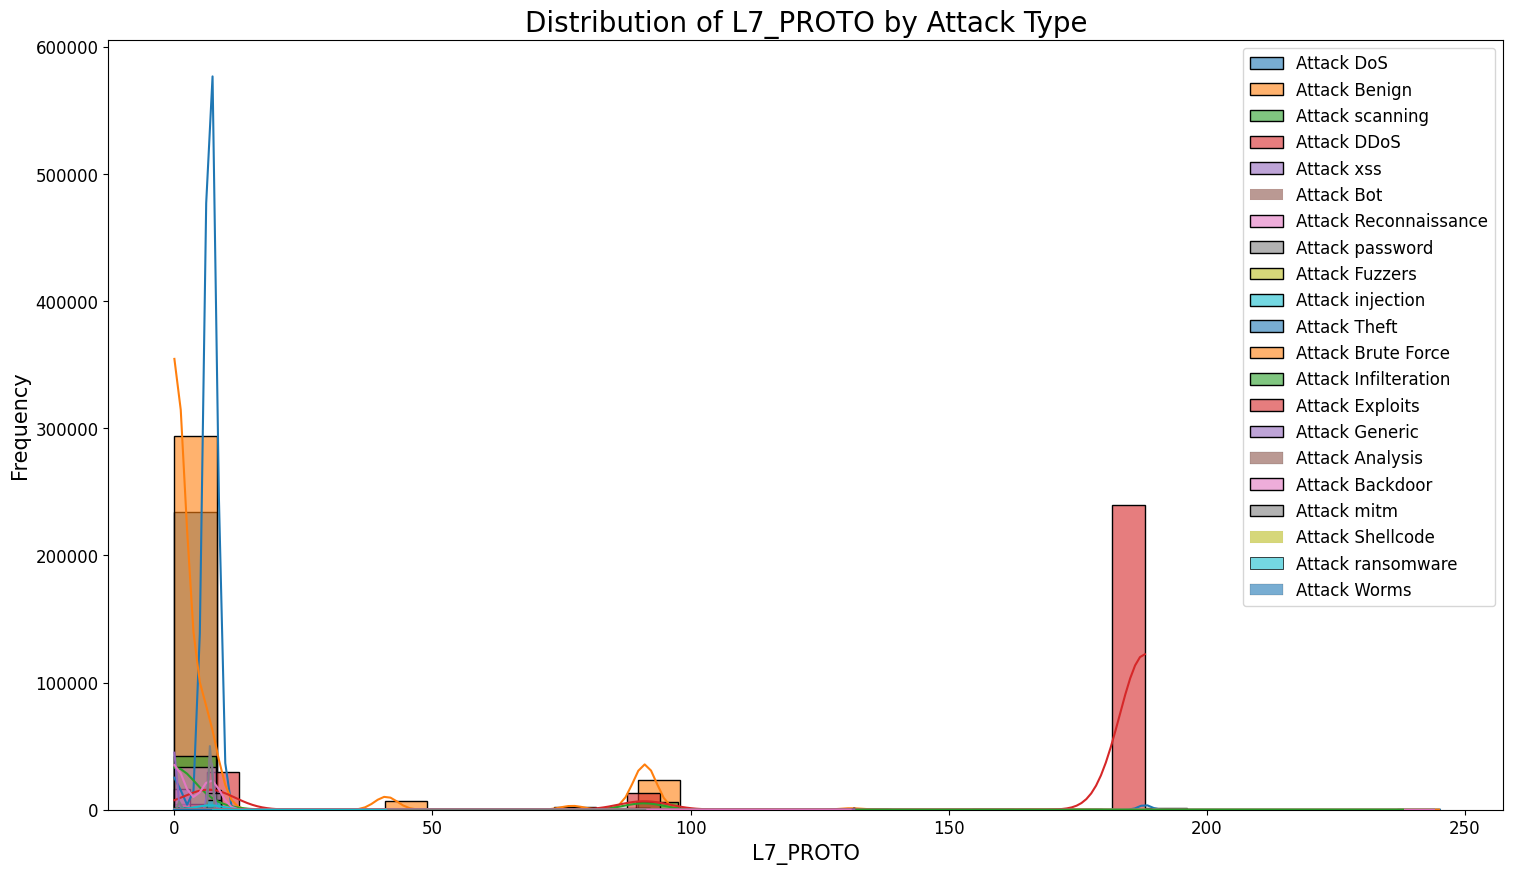

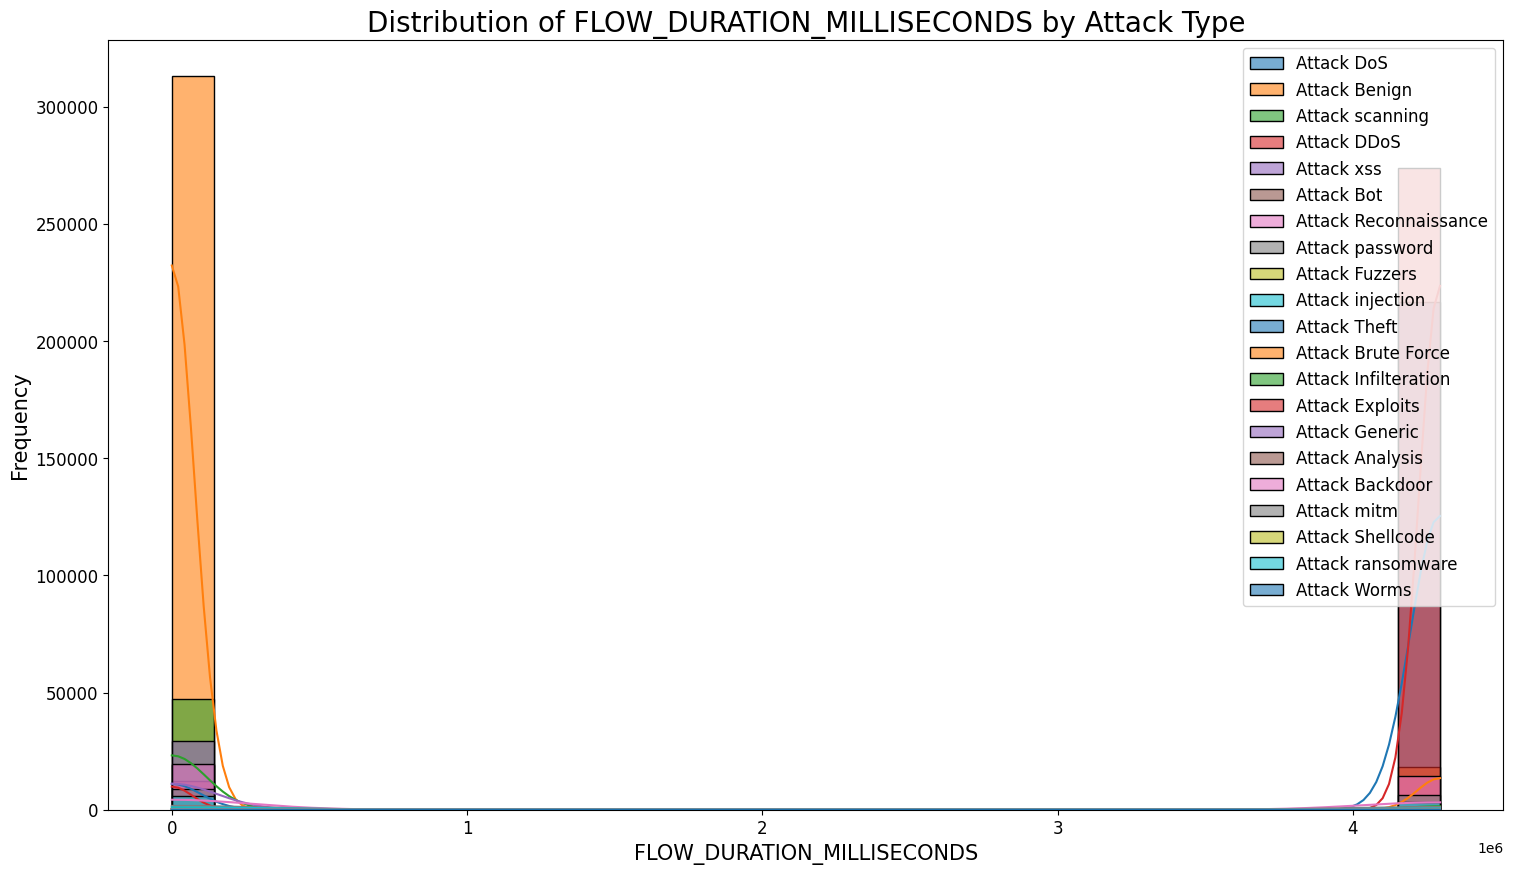

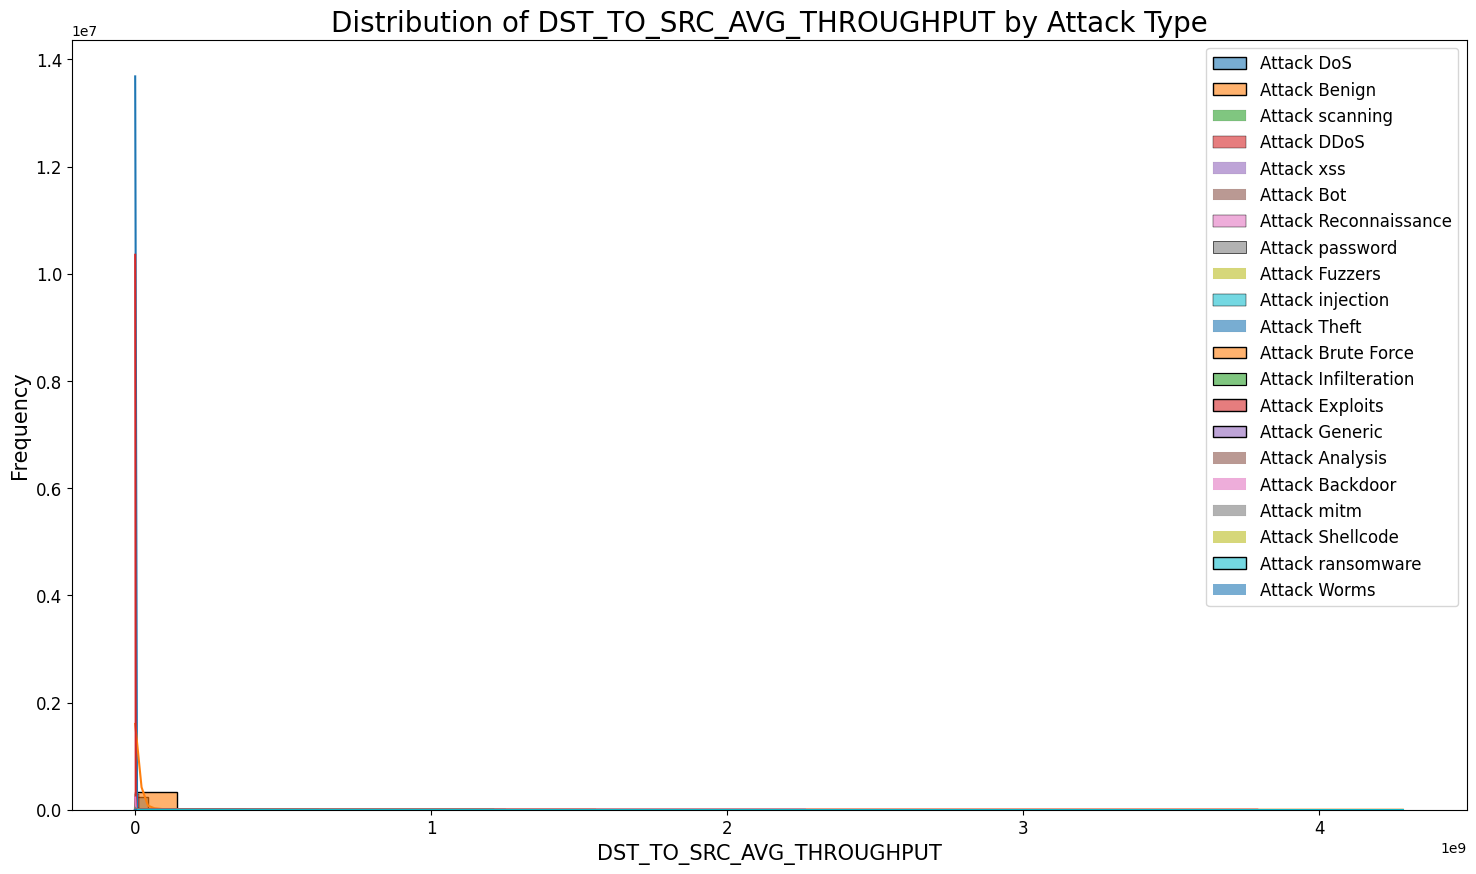

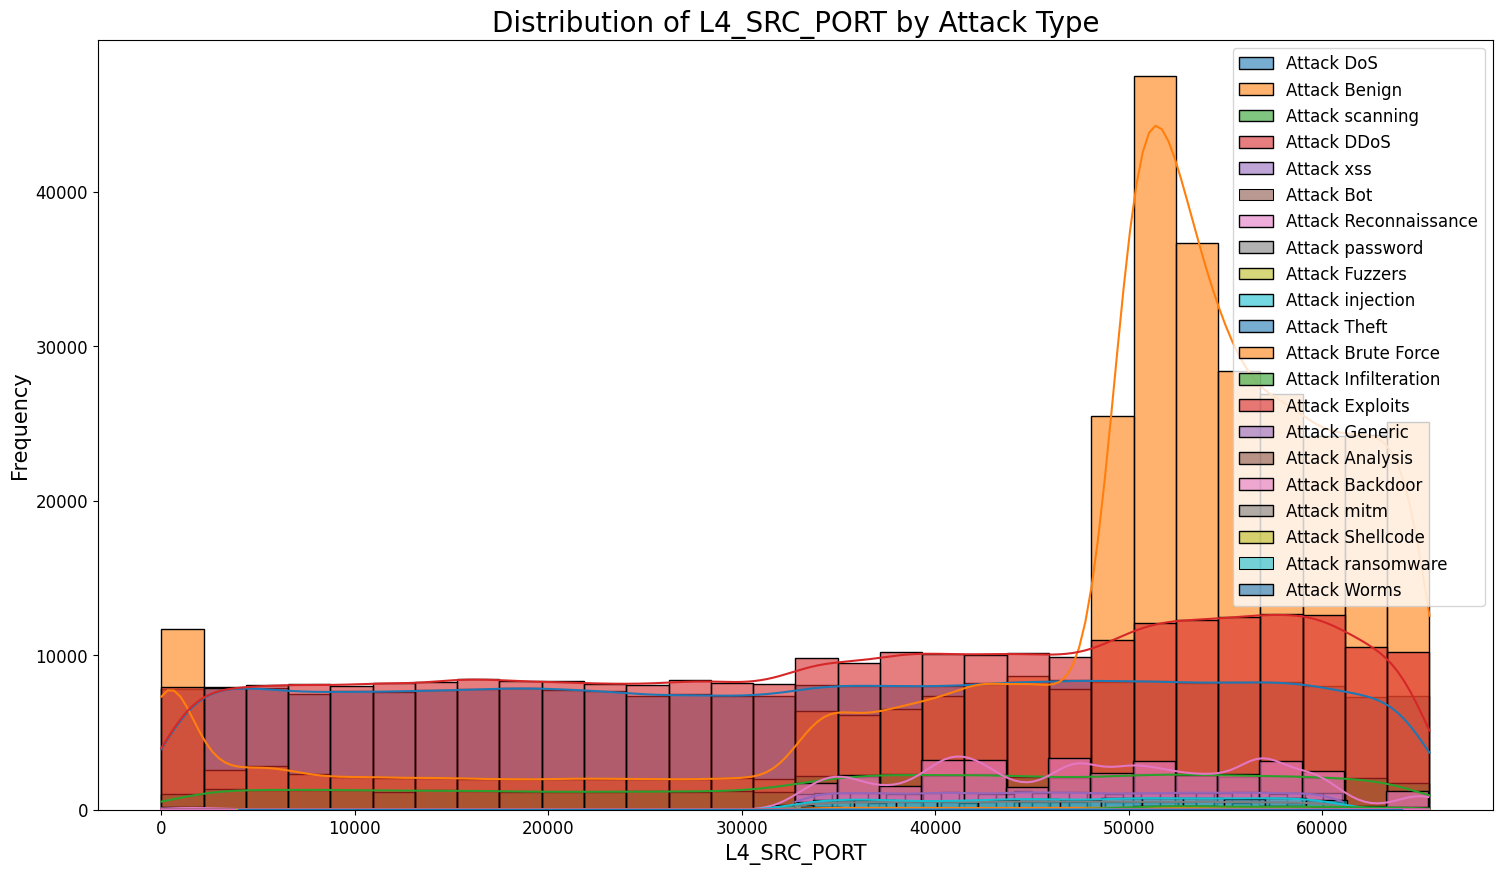

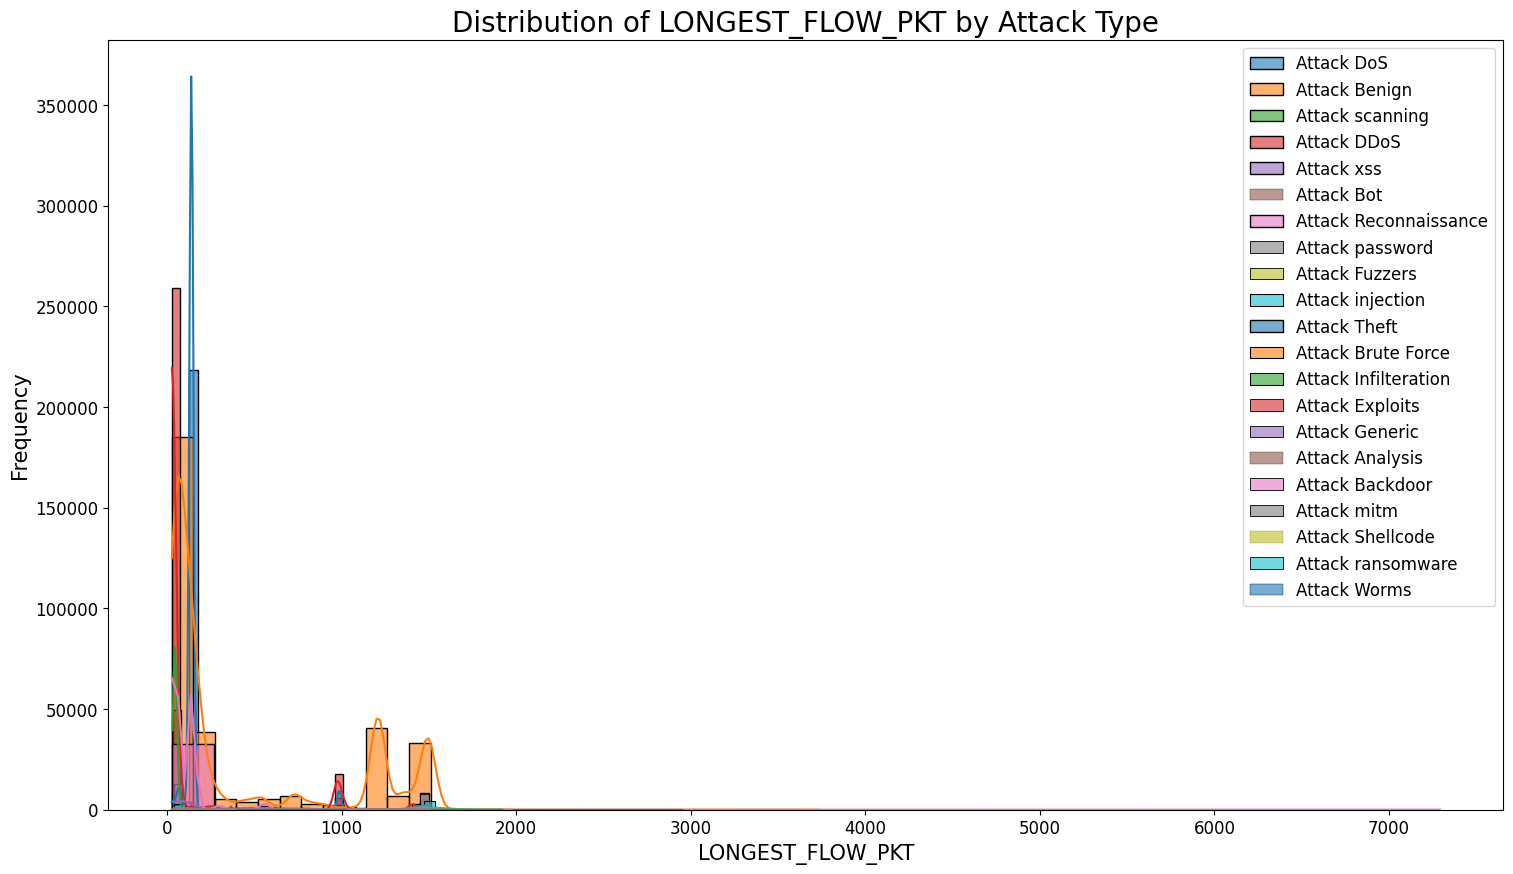

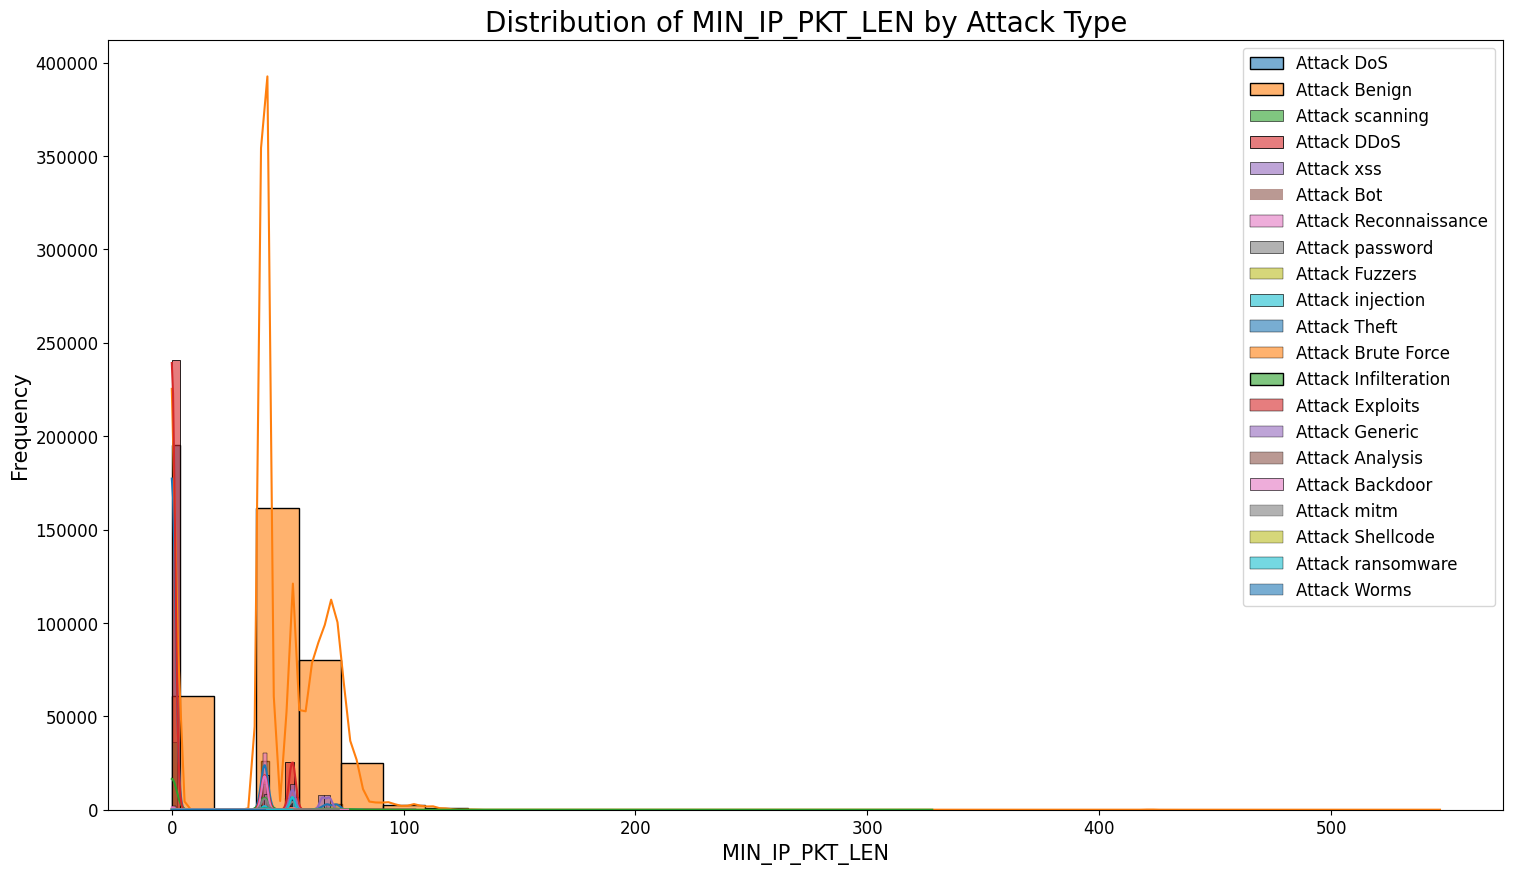

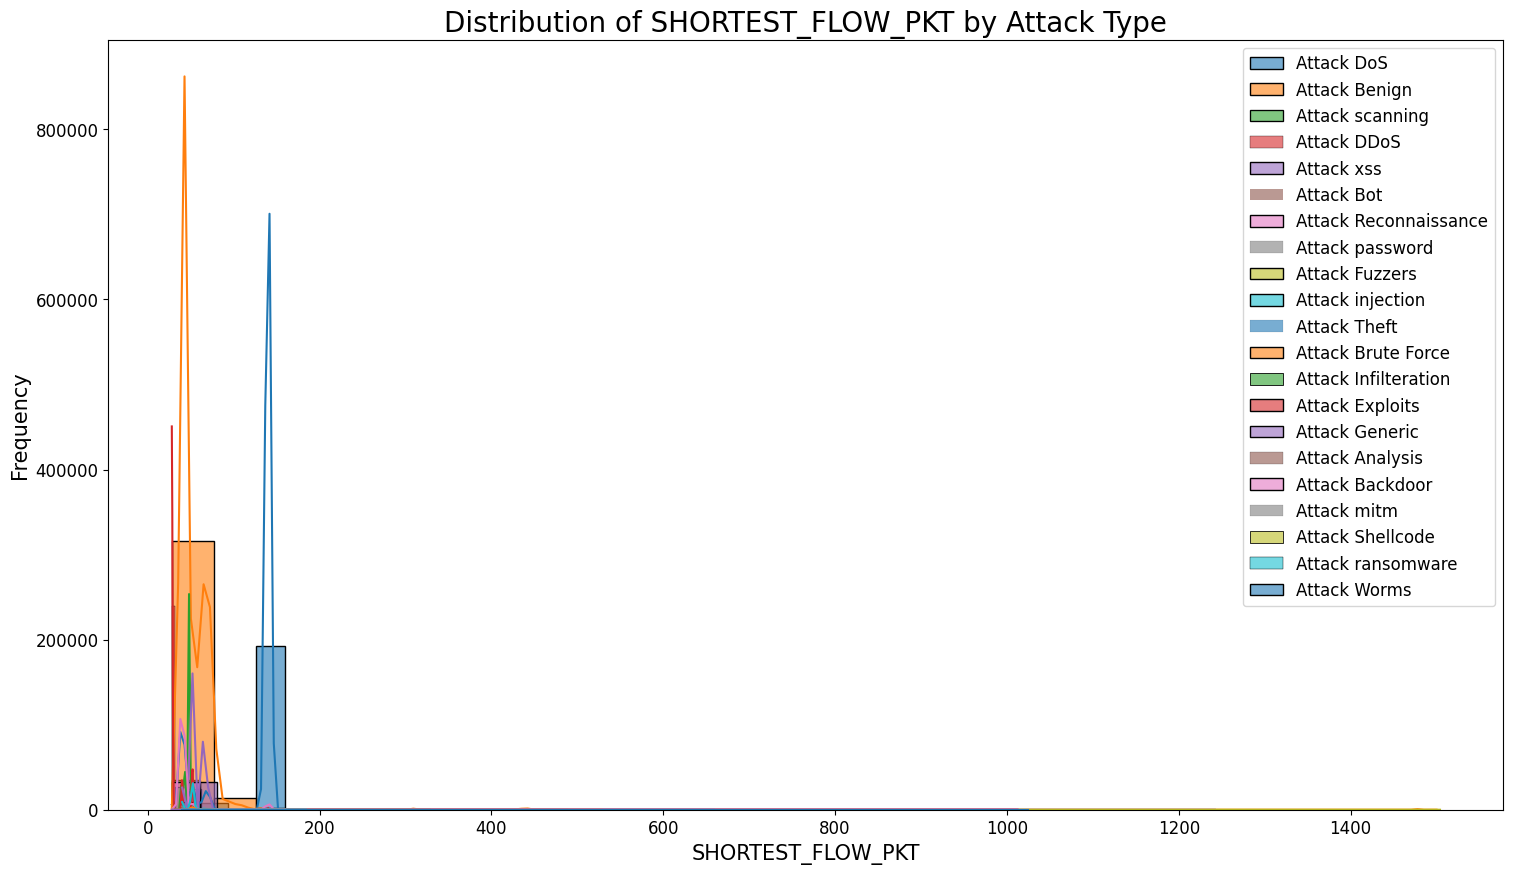

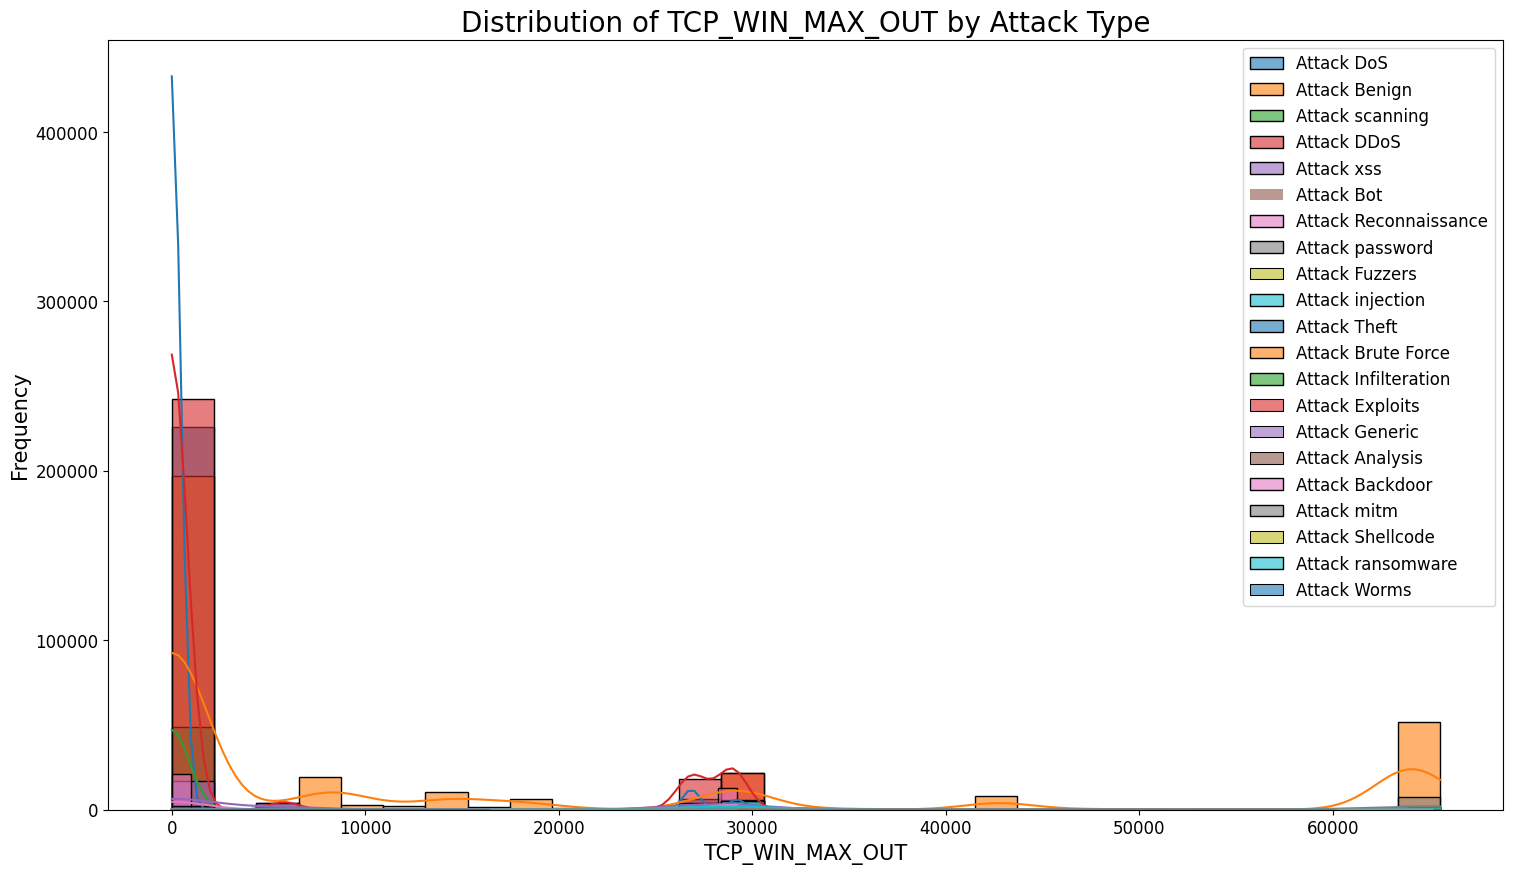

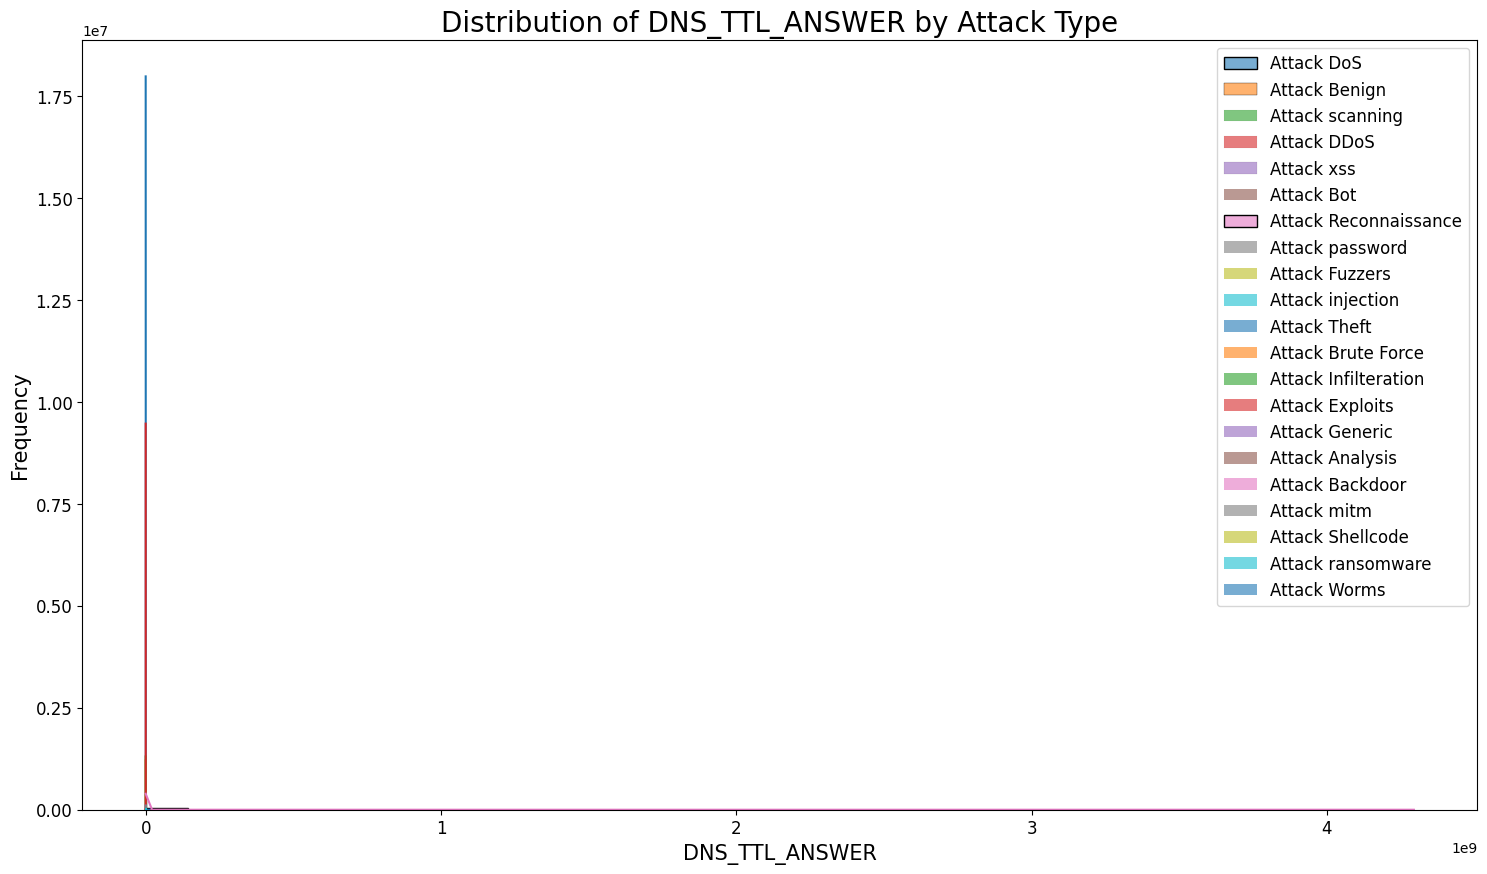

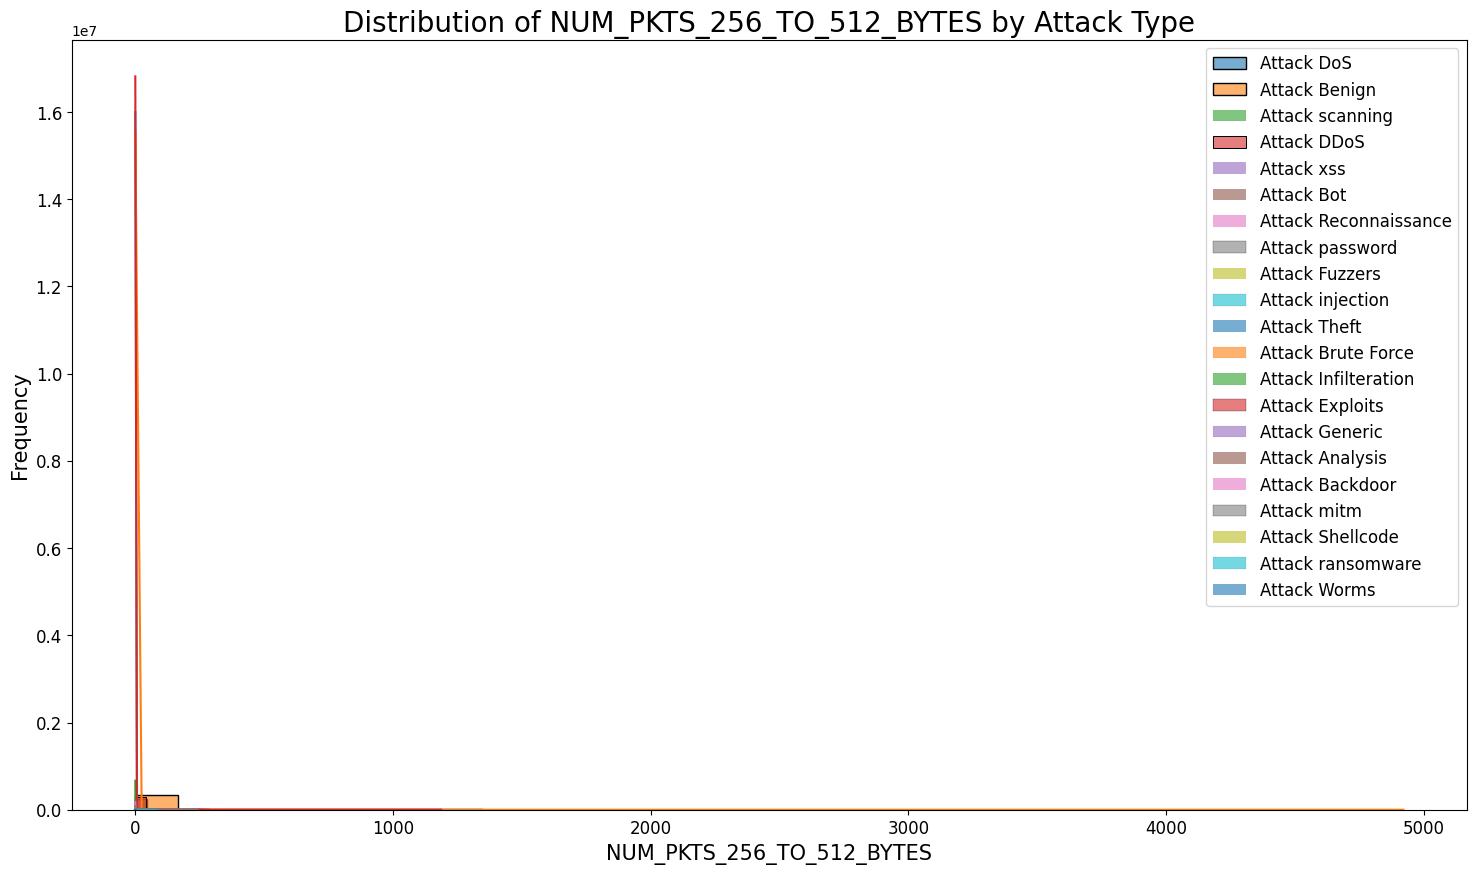

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 중요한 모든 특징을 사용
top_features = important_features

# 각 특징별로 정상 트래픽과 공격 유형별 분포 시각화
for feature in top_features:
    plt.figure(figsize=(18, 10))  # 그래프 크기 조정
    for attack in attack_types:
        sns.histplot(attack_data[attack][feature], kde=True, label=f'Attack {attack}', bins=30, alpha=0.6)
    plt.title(f'Distribution of {feature} by Attack Type', fontsize=20)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.show()

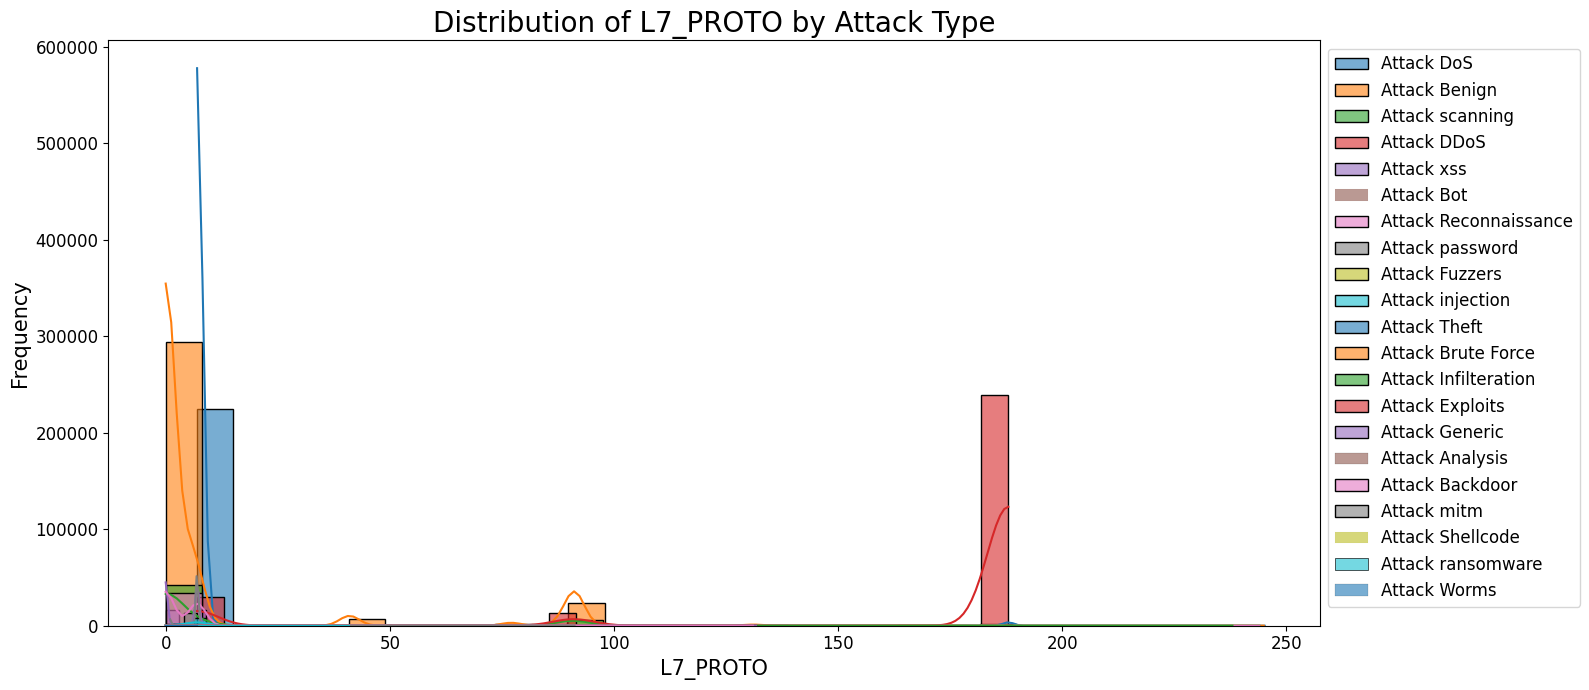

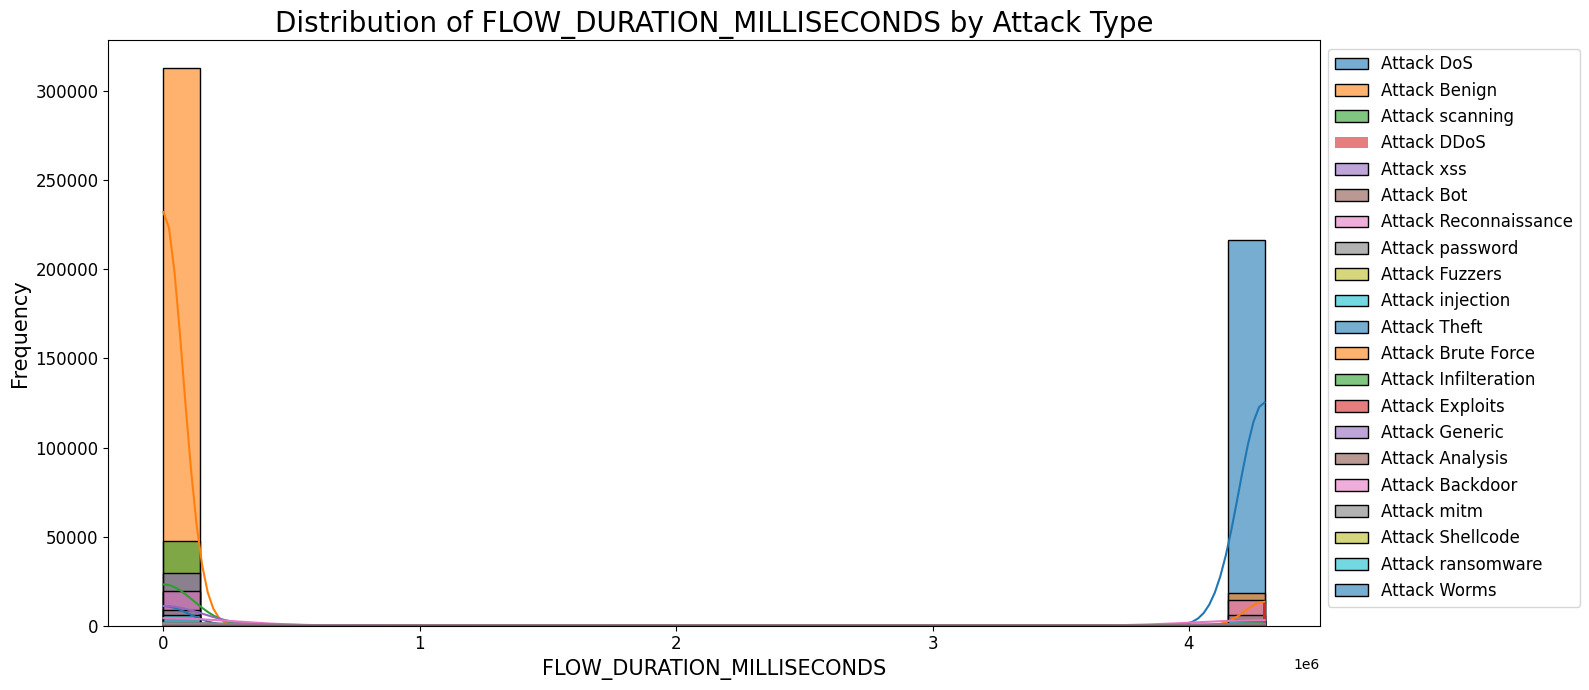

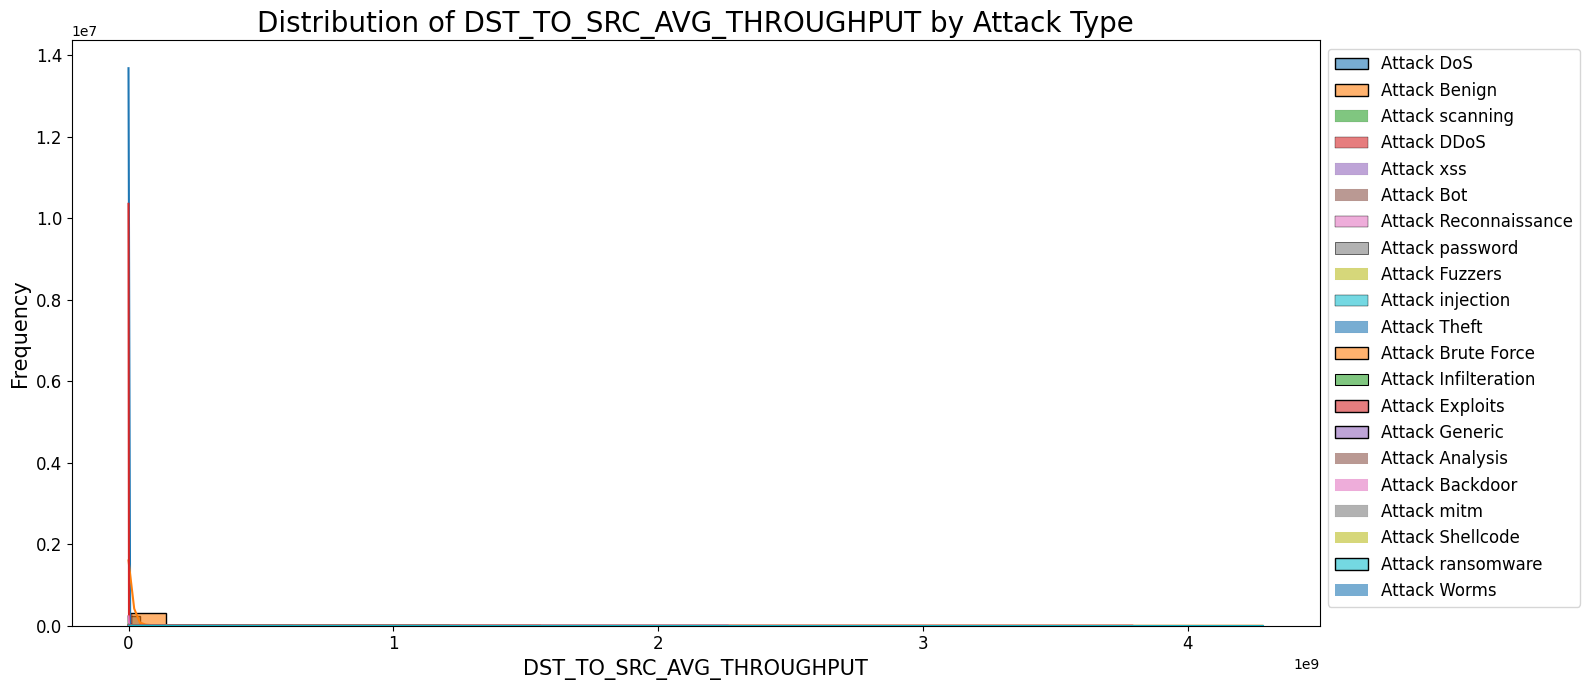

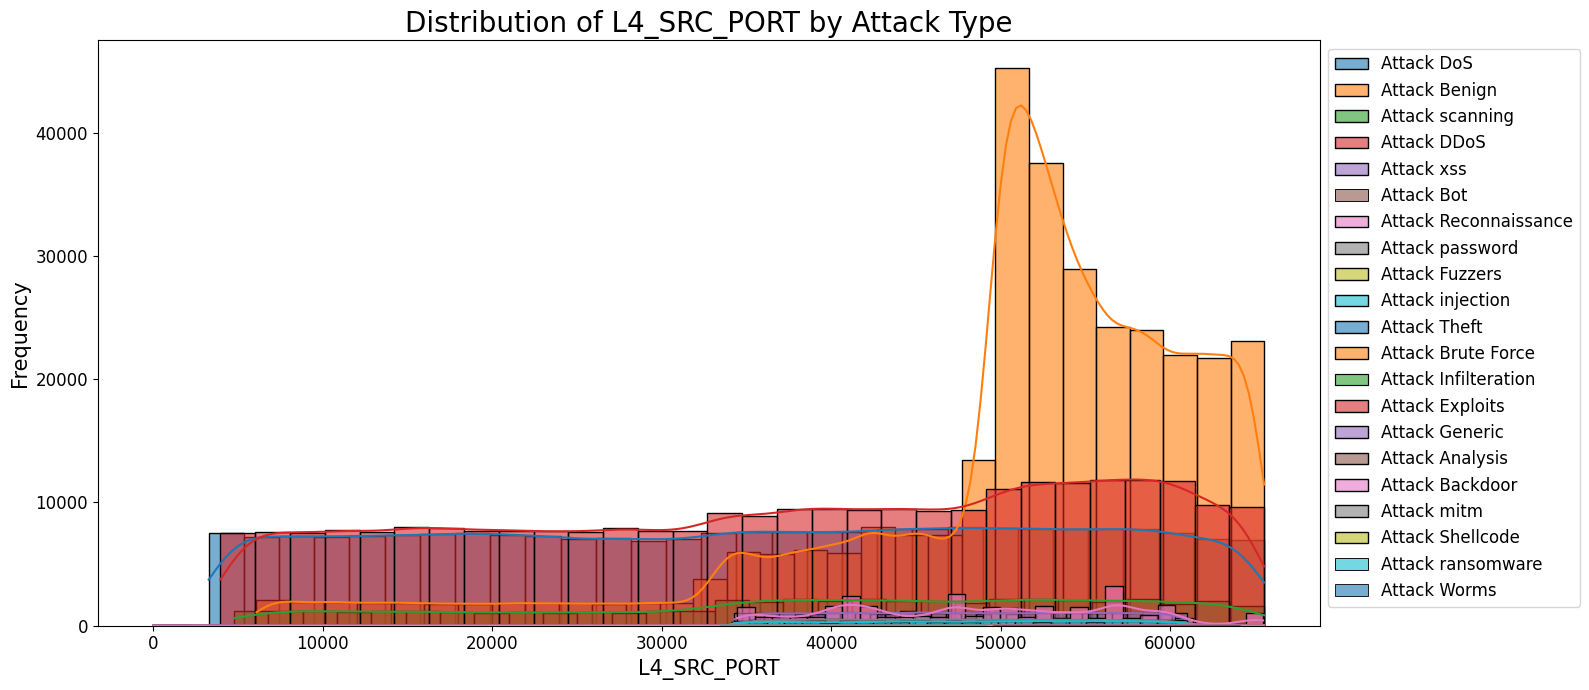

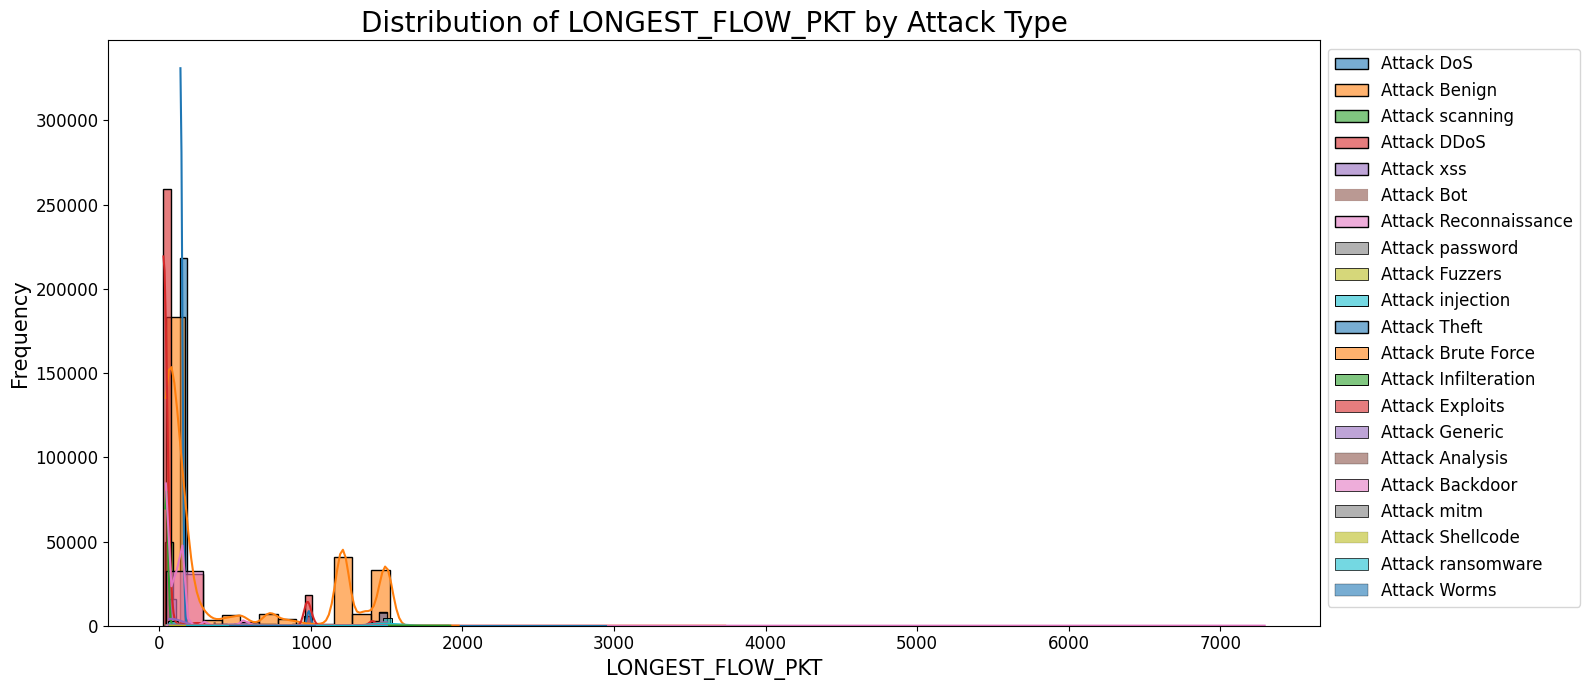

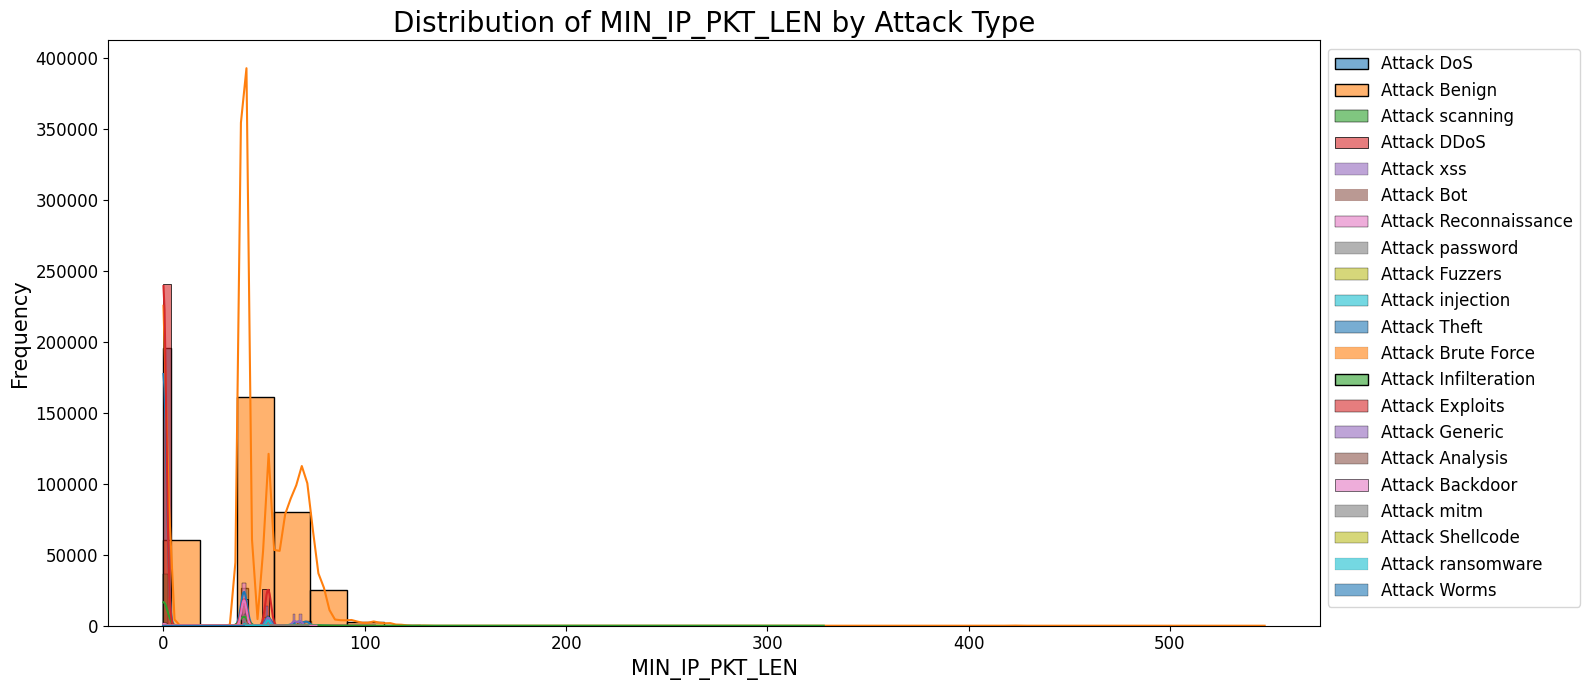

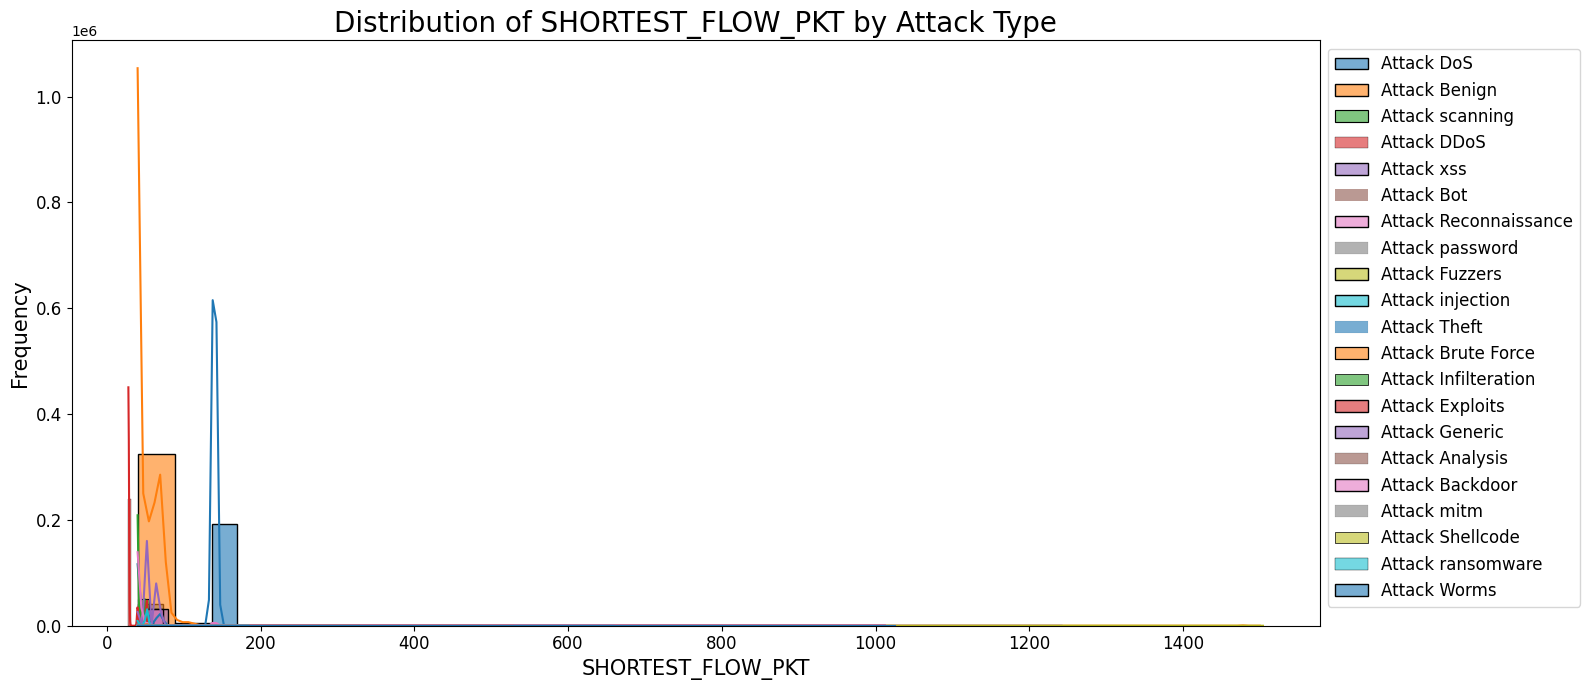

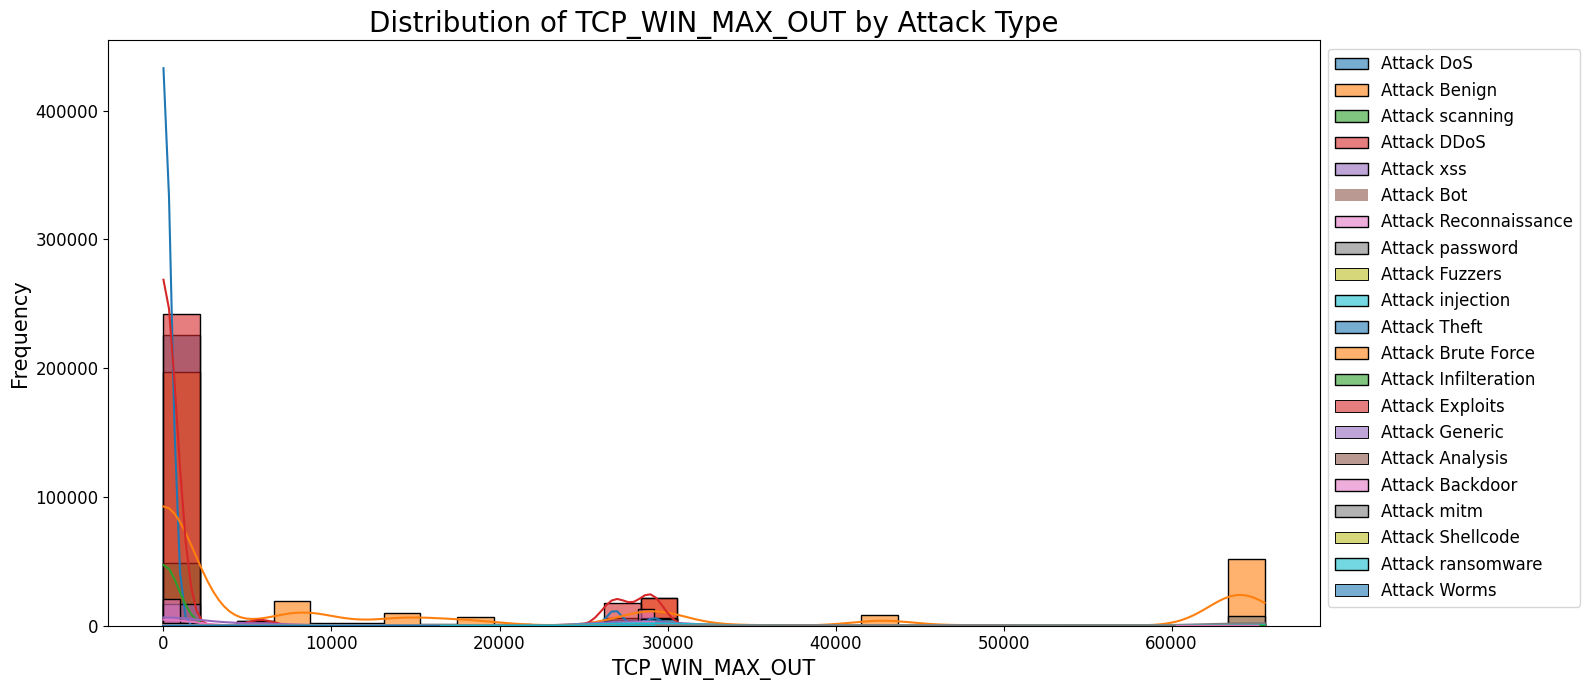

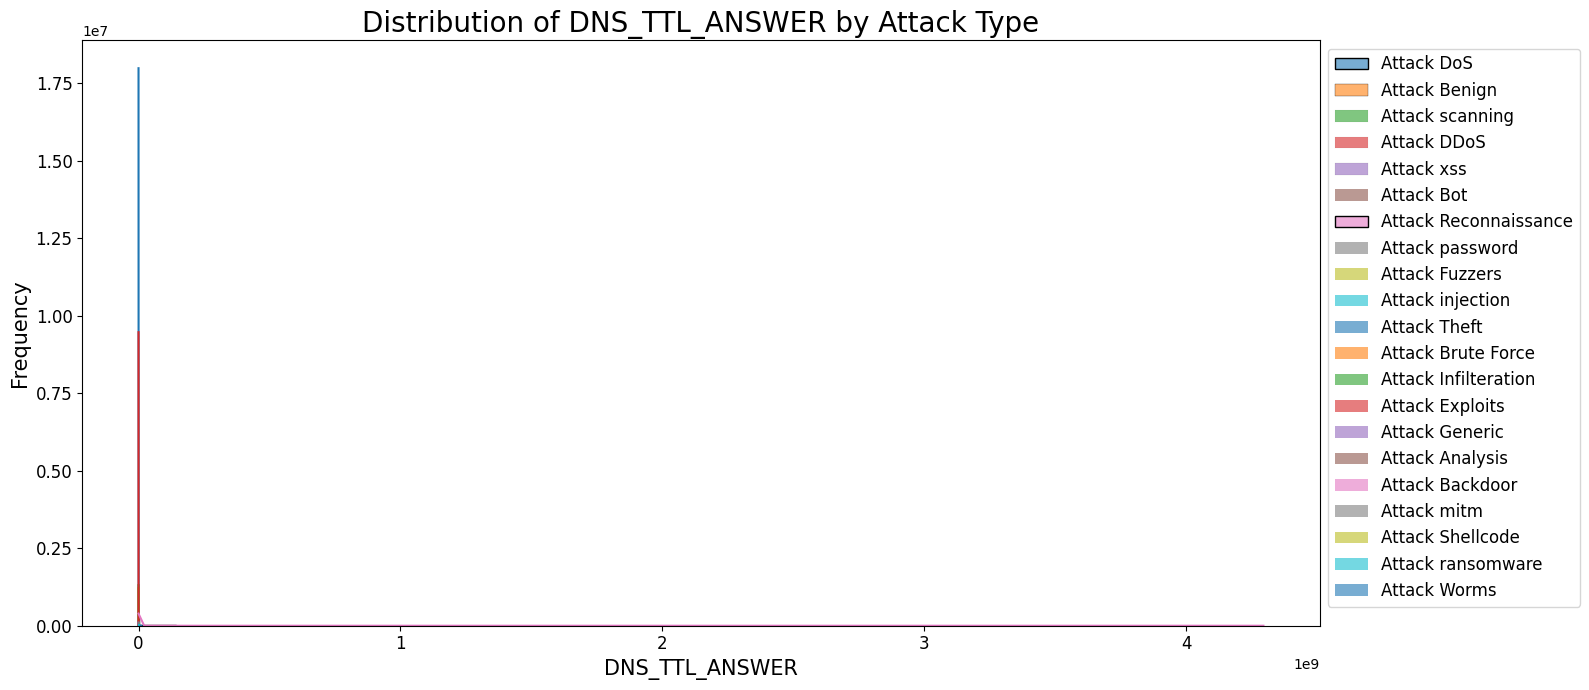

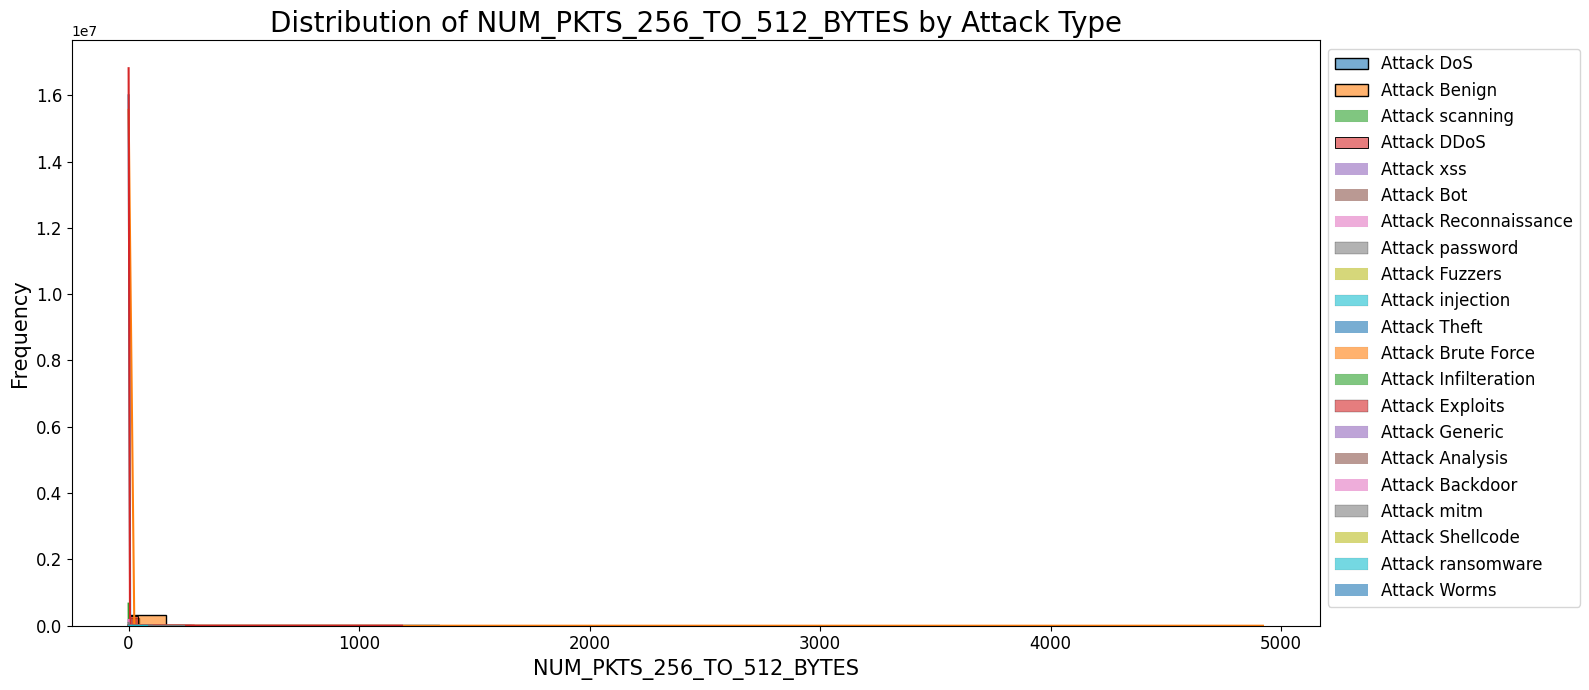

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 중요한 모든 특징을 사용
top_features = important_features

# 각 특징별로 정상 트래픽과 공격 유형별 분포 시각화
for feature in top_features:
    plt.figure(figsize=(16, 7))  # 그래프 크기 조정

    # 각 공격 유형별로 특정 분포 구간 설정
    for attack in attack_types:
        data = attack_data[attack][feature]

        # 주요 분포 구간 설정 (예: 0.5% ~ 99.5% 백분위)
        lower_bound = data.quantile(0.05)
        upper_bound = data.quantile(1)

        subset_data = data[(data >= lower_bound) & (data <= upper_bound)]
        sns.histplot(subset_data, kde=True, label=f'Attack {attack}', bins=30, alpha=0.6)

    plt.title(f'Distribution of {feature} by Attack Type', fontsize=20)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # 범례를 그래프 밖으로 이동
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.tight_layout()  # 그래프 레이아웃 조정
    plt.show()

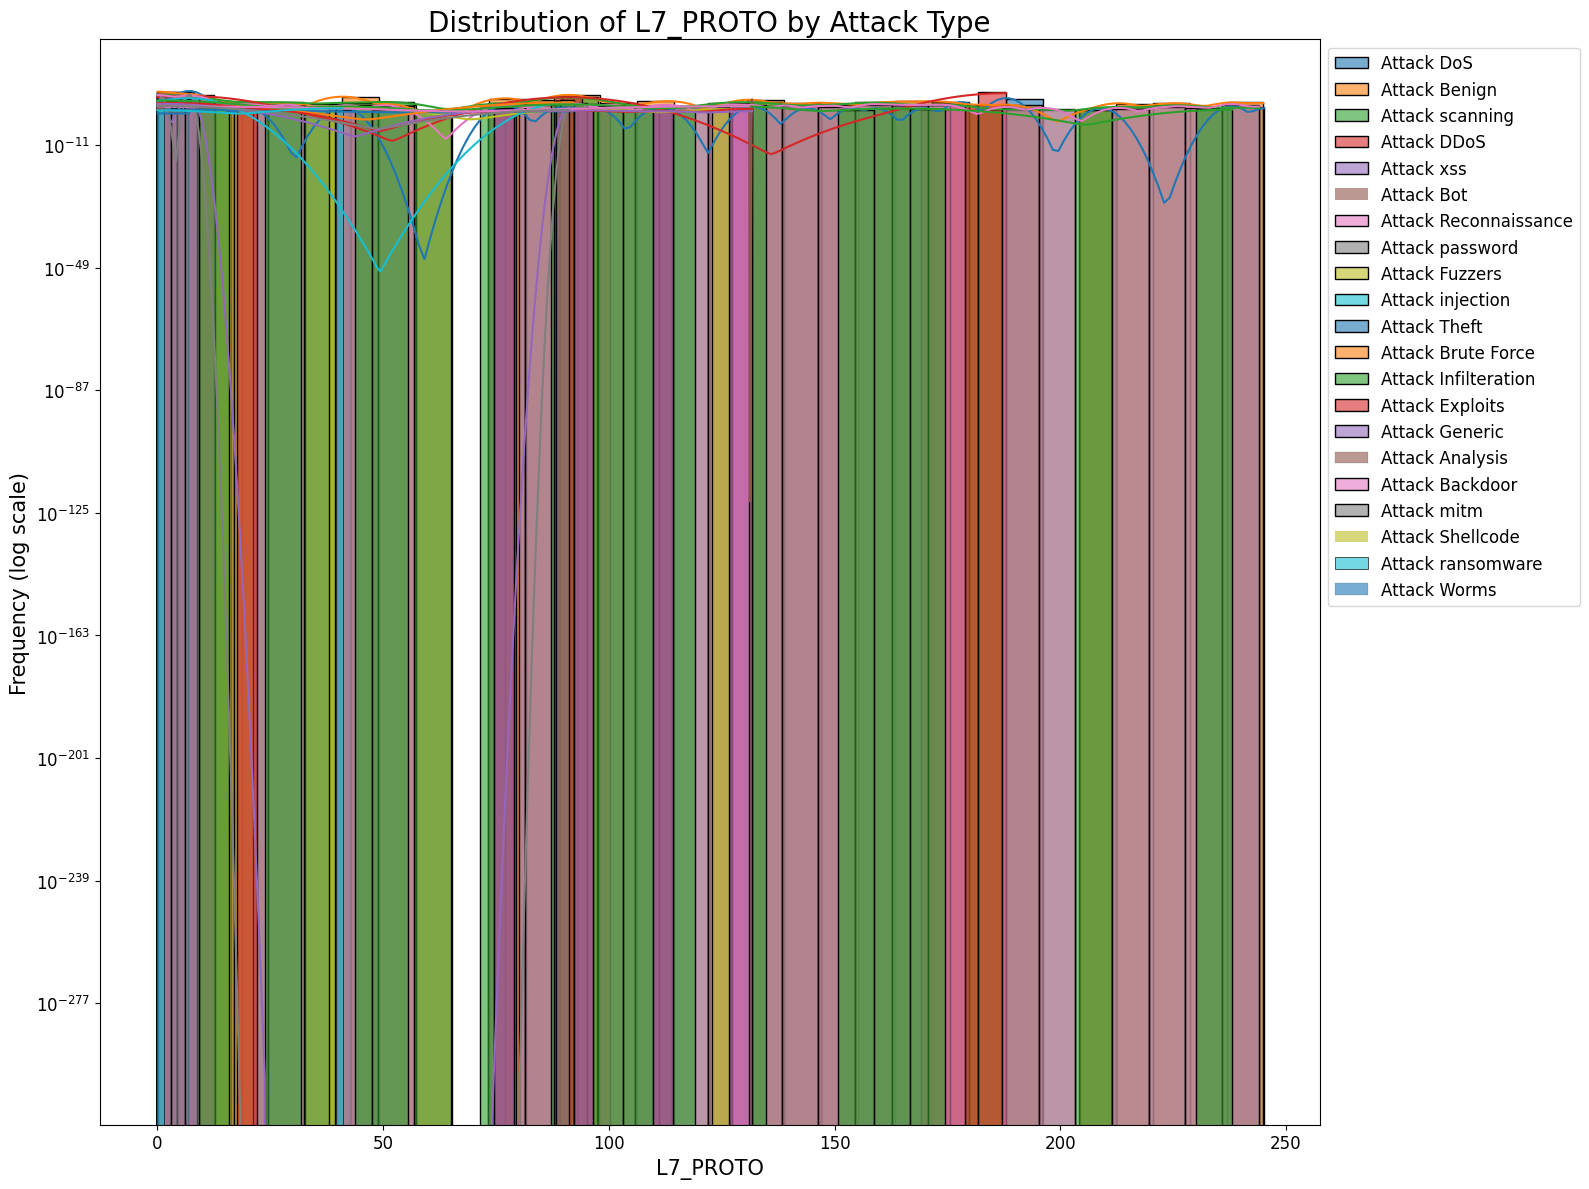

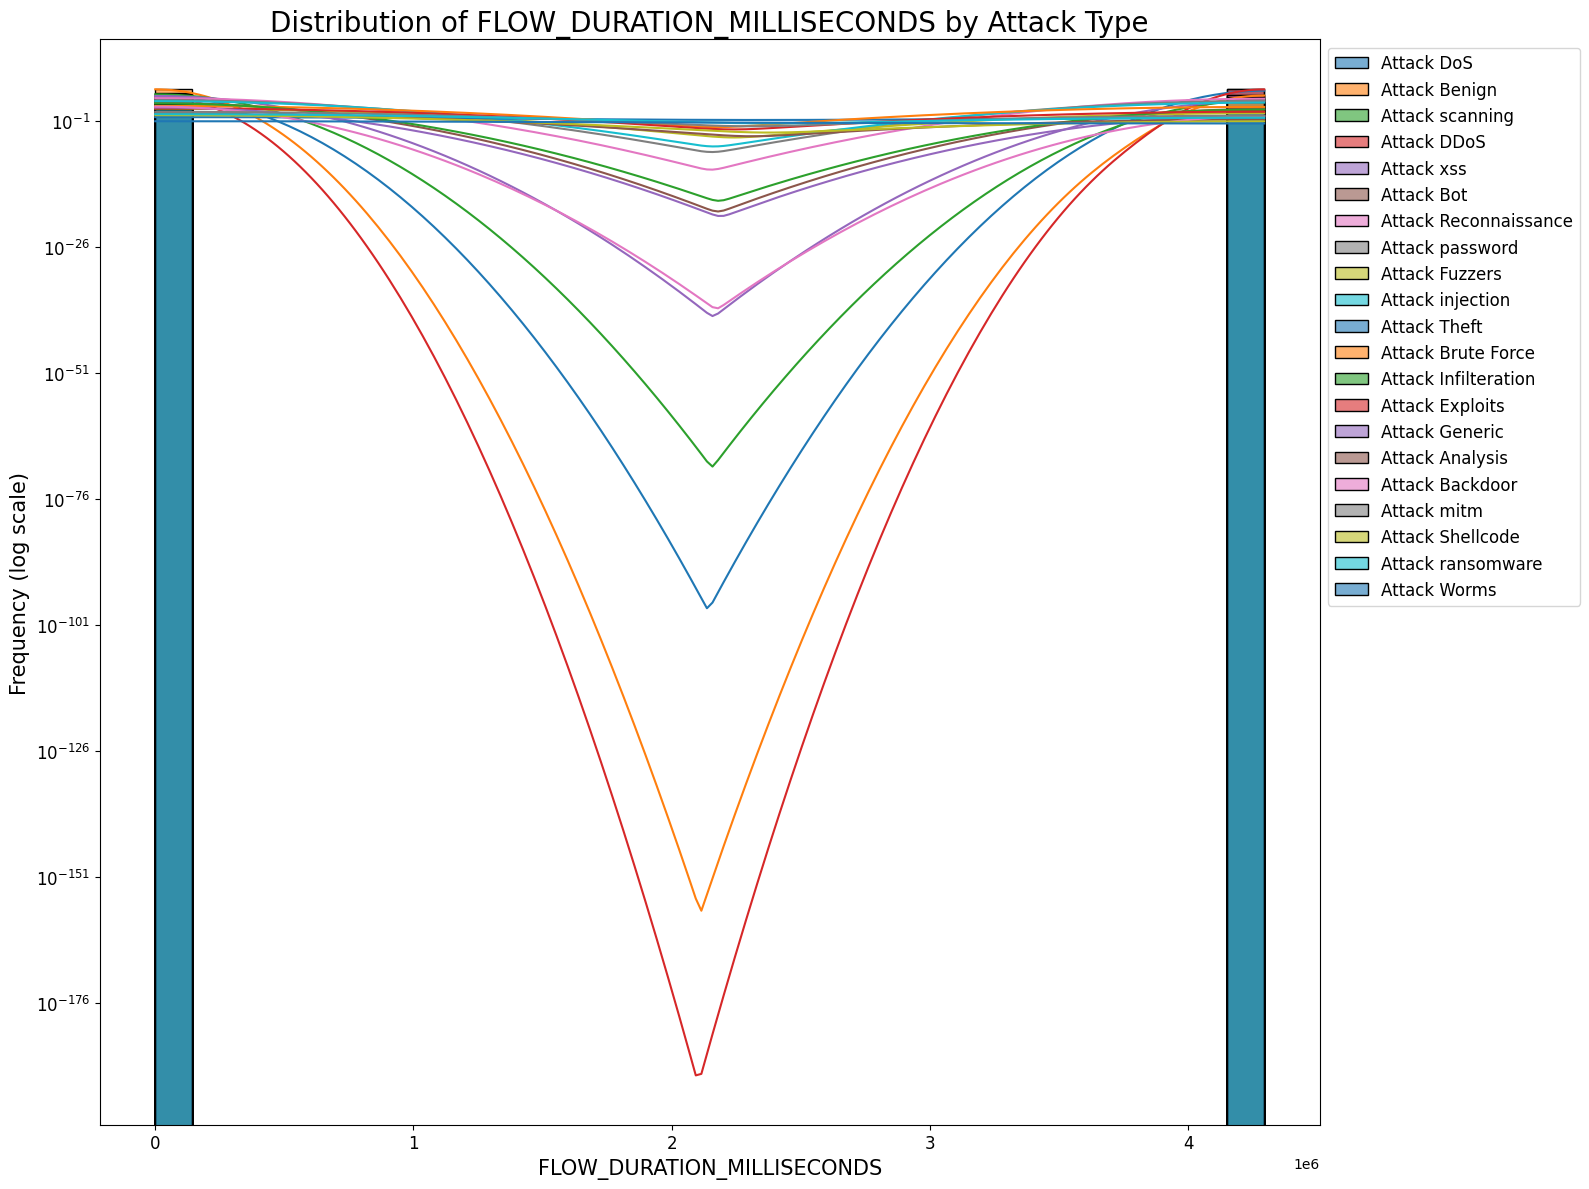

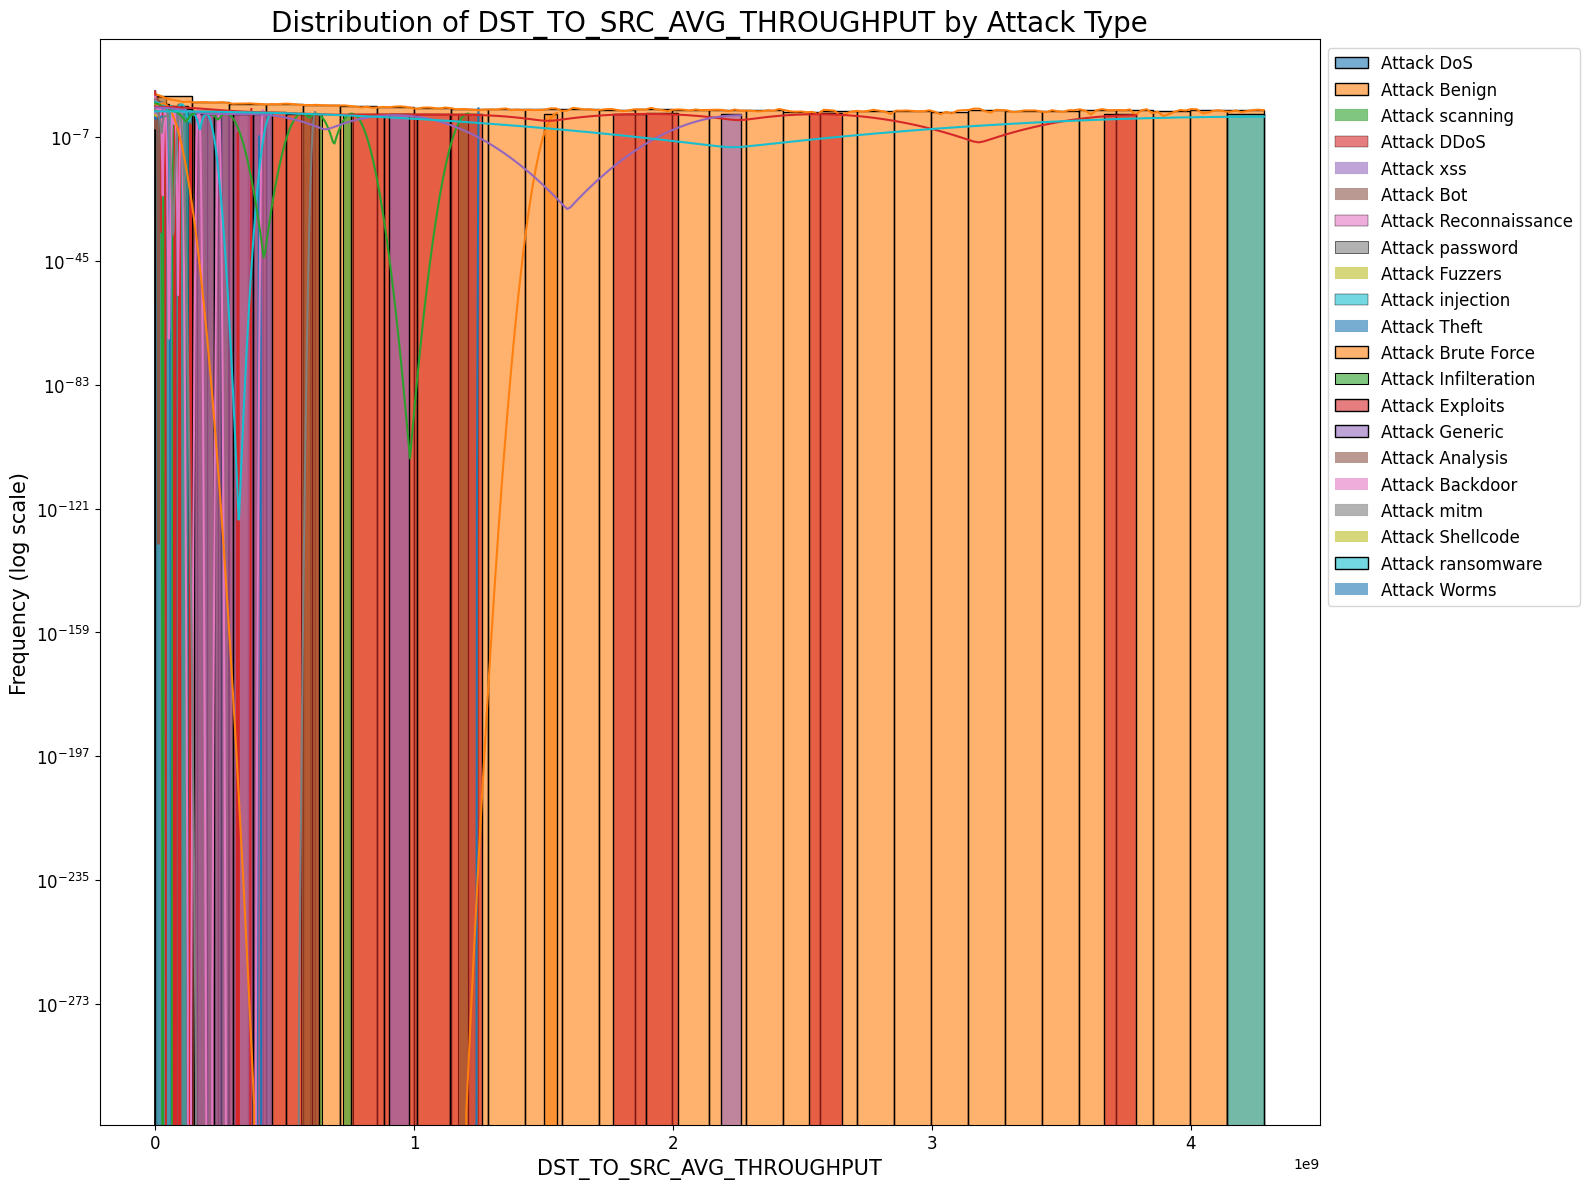

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 중요한 모든 특징을 사용
top_features = important_features[:3]

# 각 특징별로 정상 트래픽과 공격 유형별 분포 시각화
for feature in top_features:
    plt.figure(figsize=(16, 12))

    # 각 공격 유형별로 데이터 시각화
    for attack in attack_types:
        data = attack_data[attack][feature]

        # 데이터 필터링 (전체 데이터 사용)
        sns.histplot(data, kde=True, label=f'Attack {attack}', bins=30, alpha=0.6)

    plt.title(f'Distribution of {feature} by Attack Type', fontsize=20)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('Frequency (log scale)', fontsize=15)
    plt.yscale('log')  # y축을 로그 스케일로 설정
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # 범례를 그래프 밖으로 이동
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.tight_layout()  # 그래프 레이아웃 조정
    plt.show()


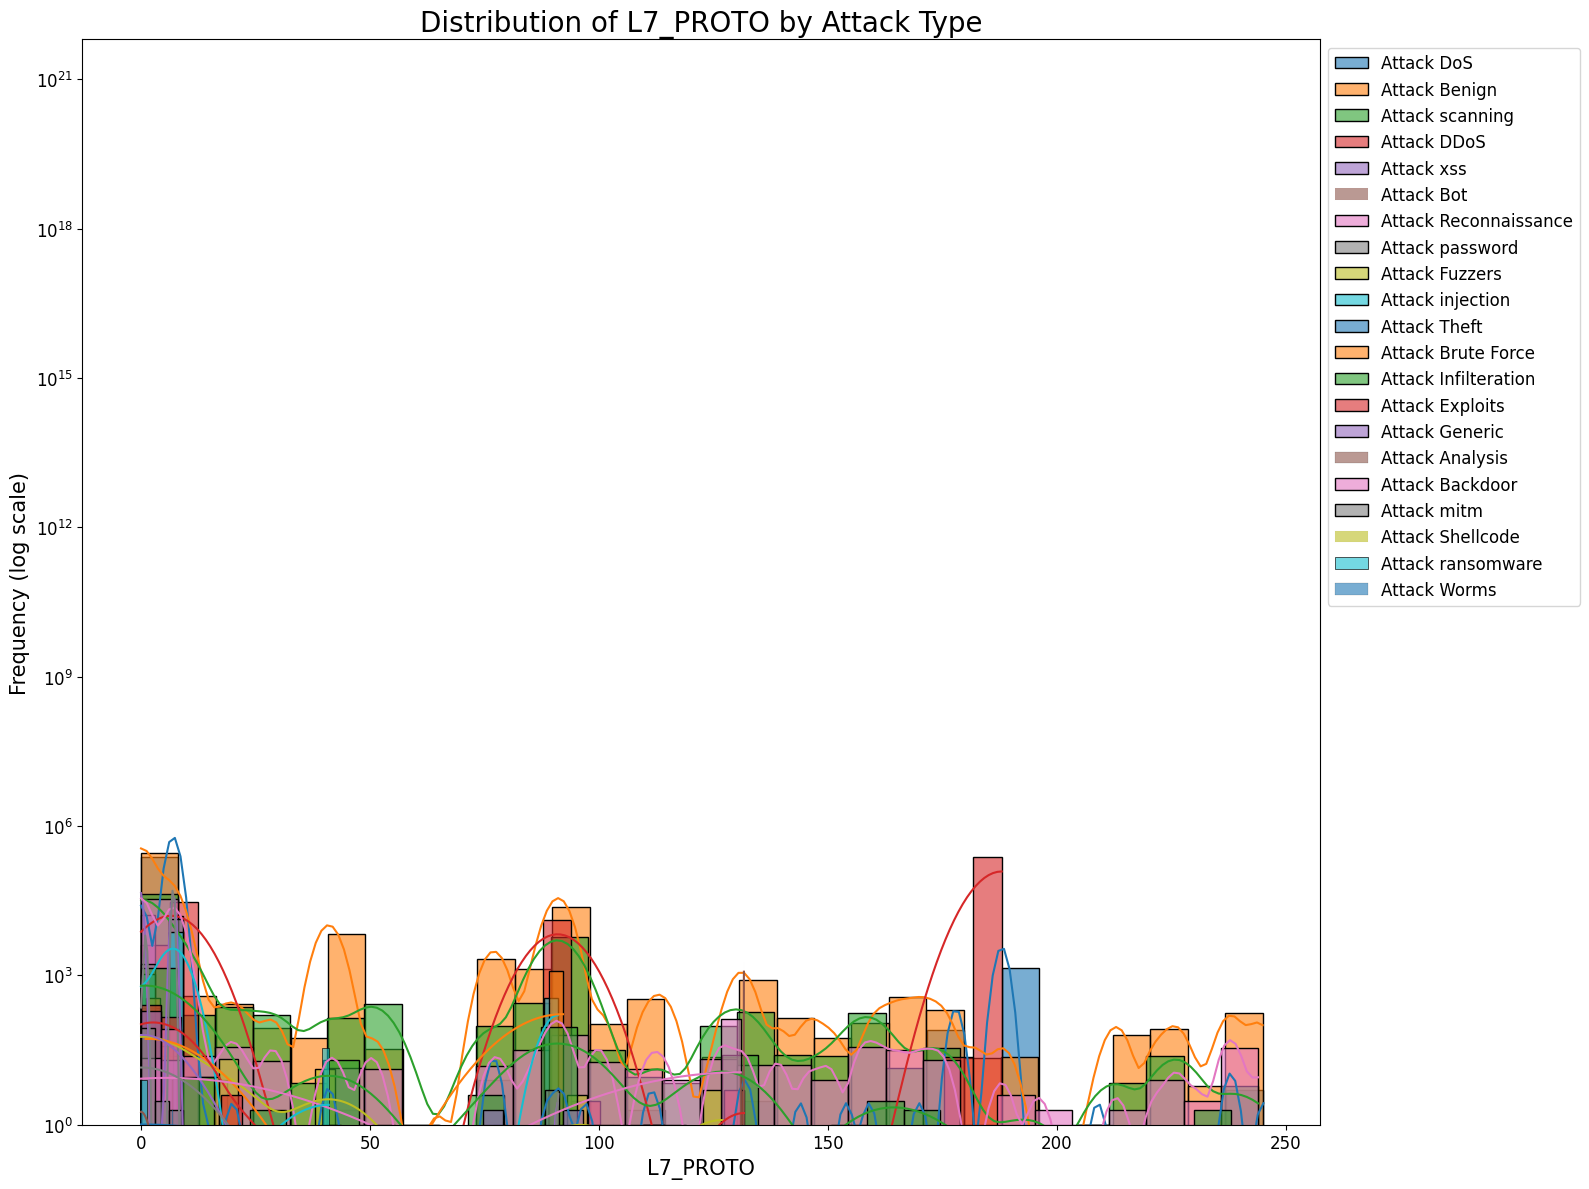

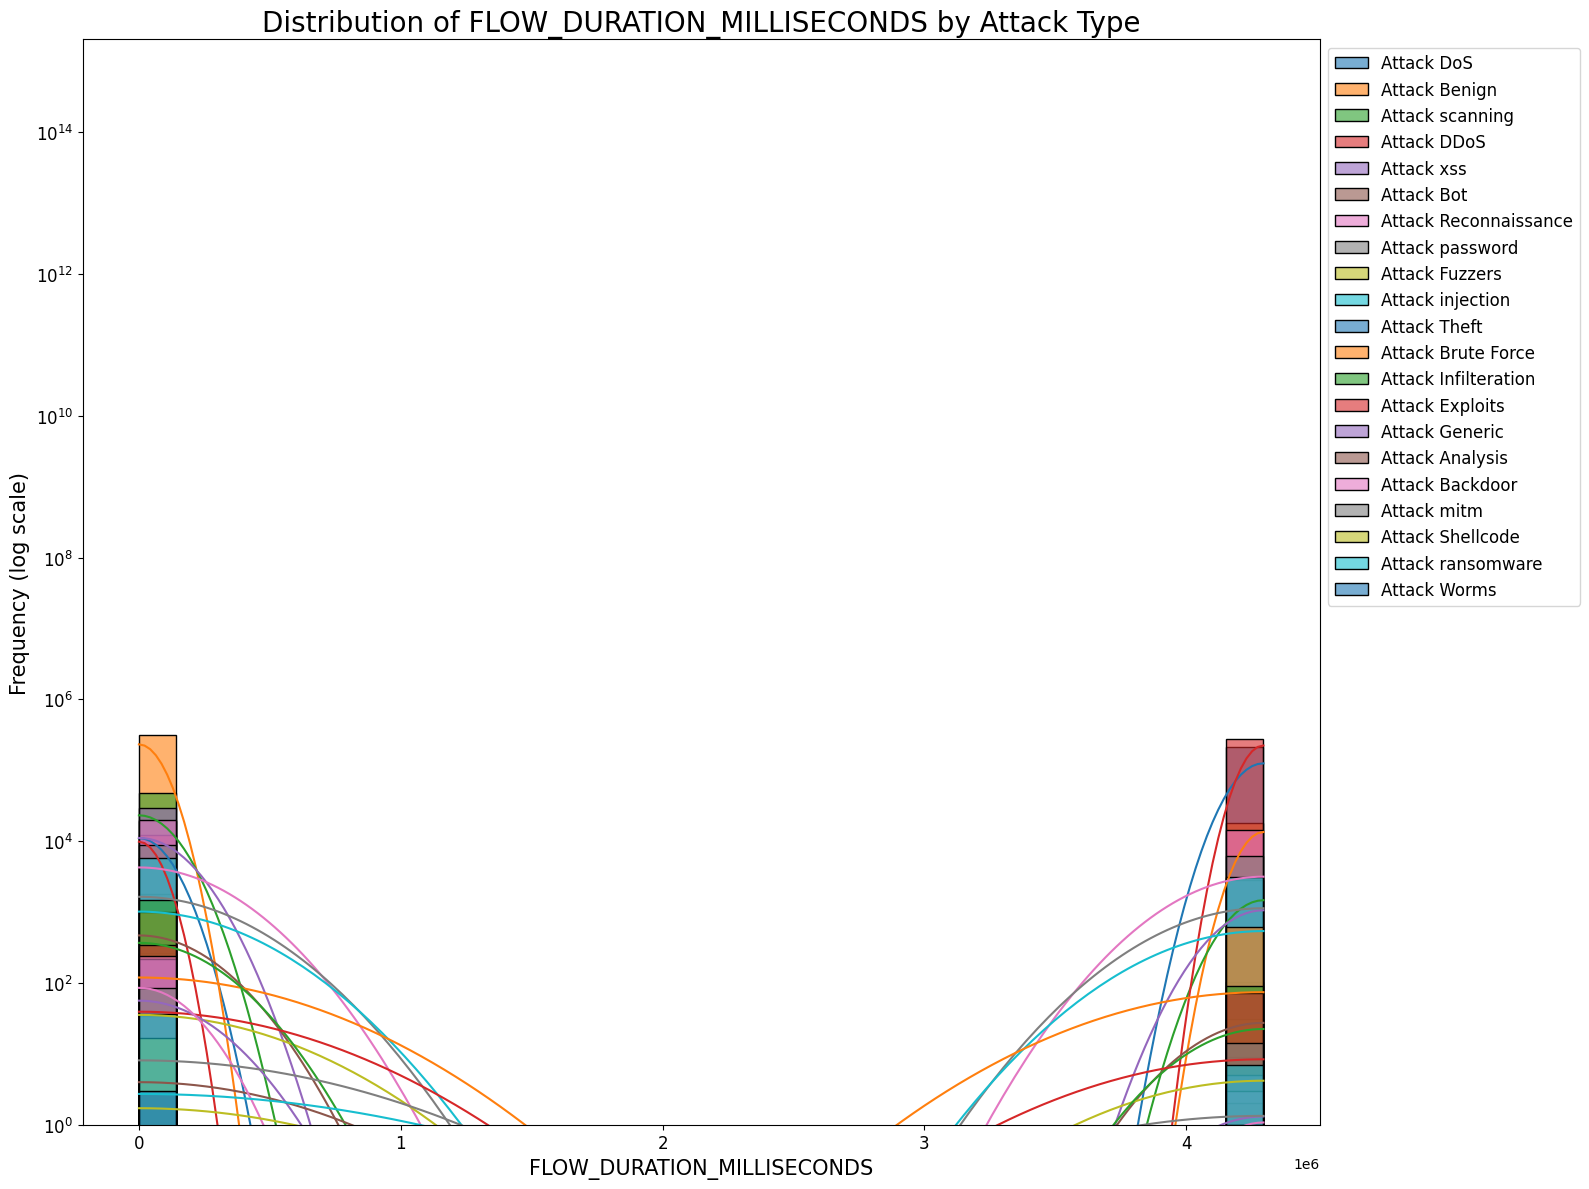

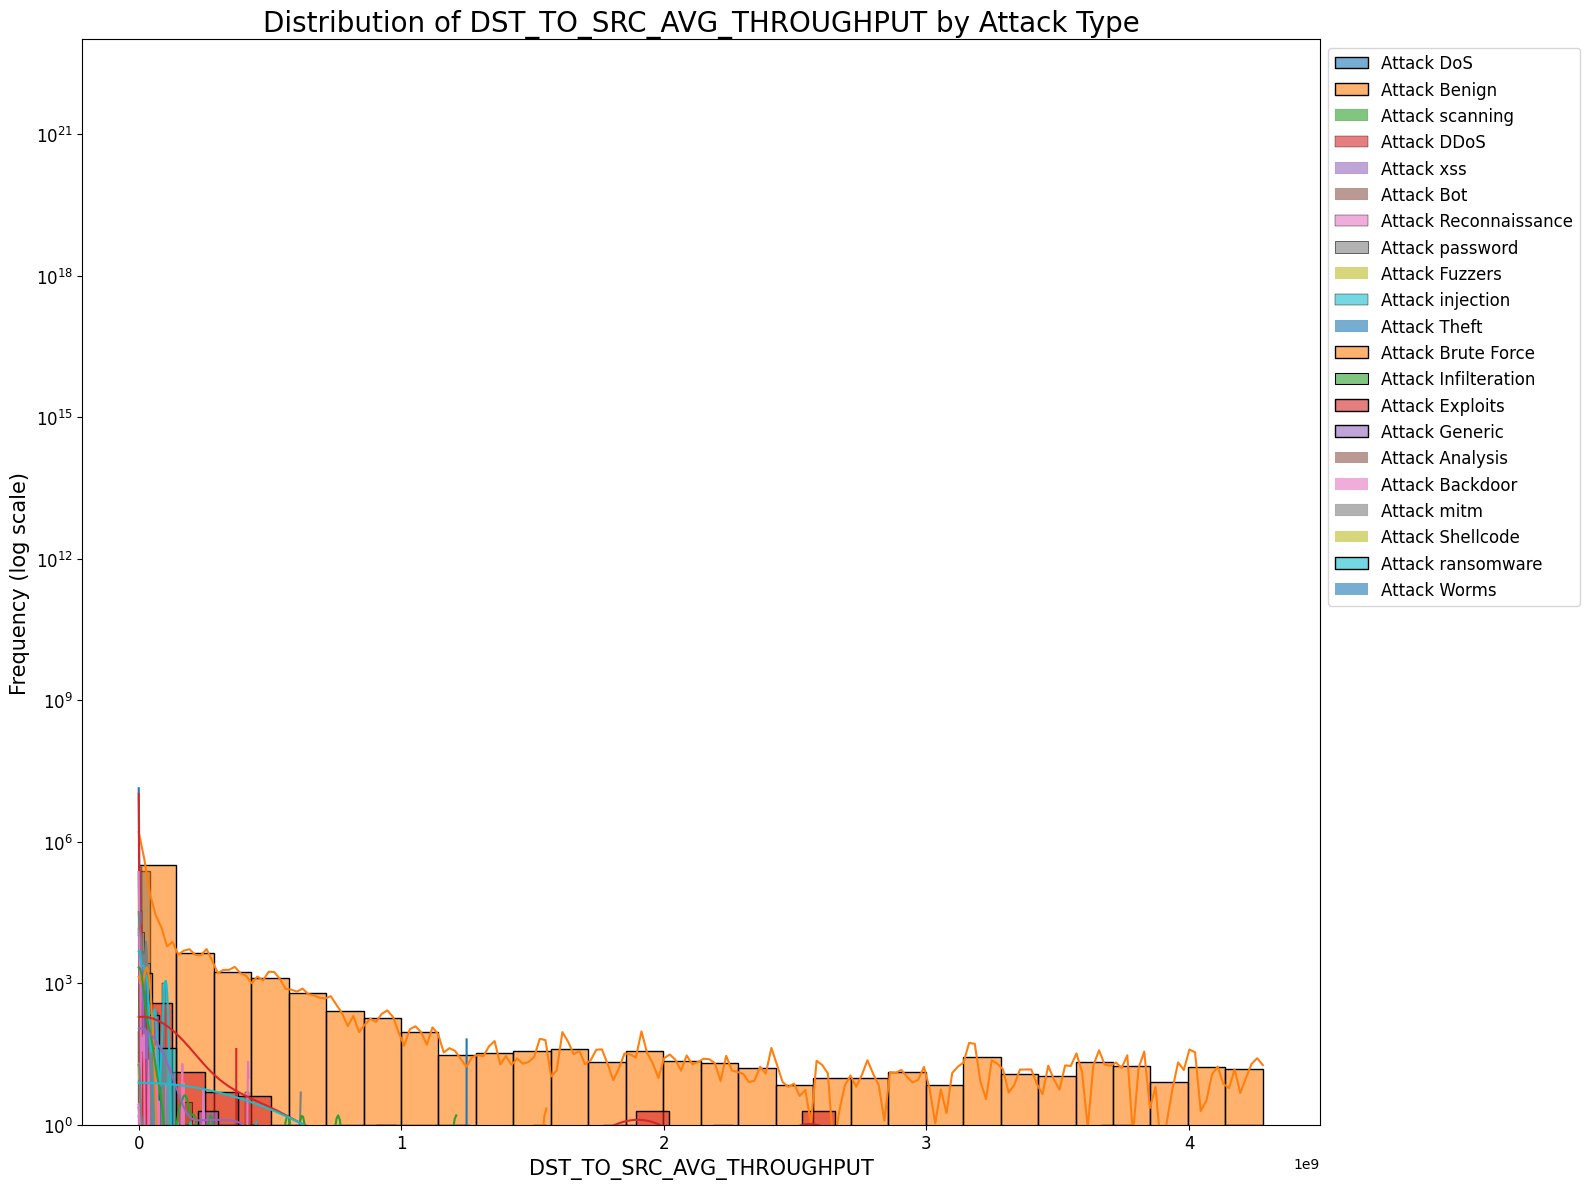

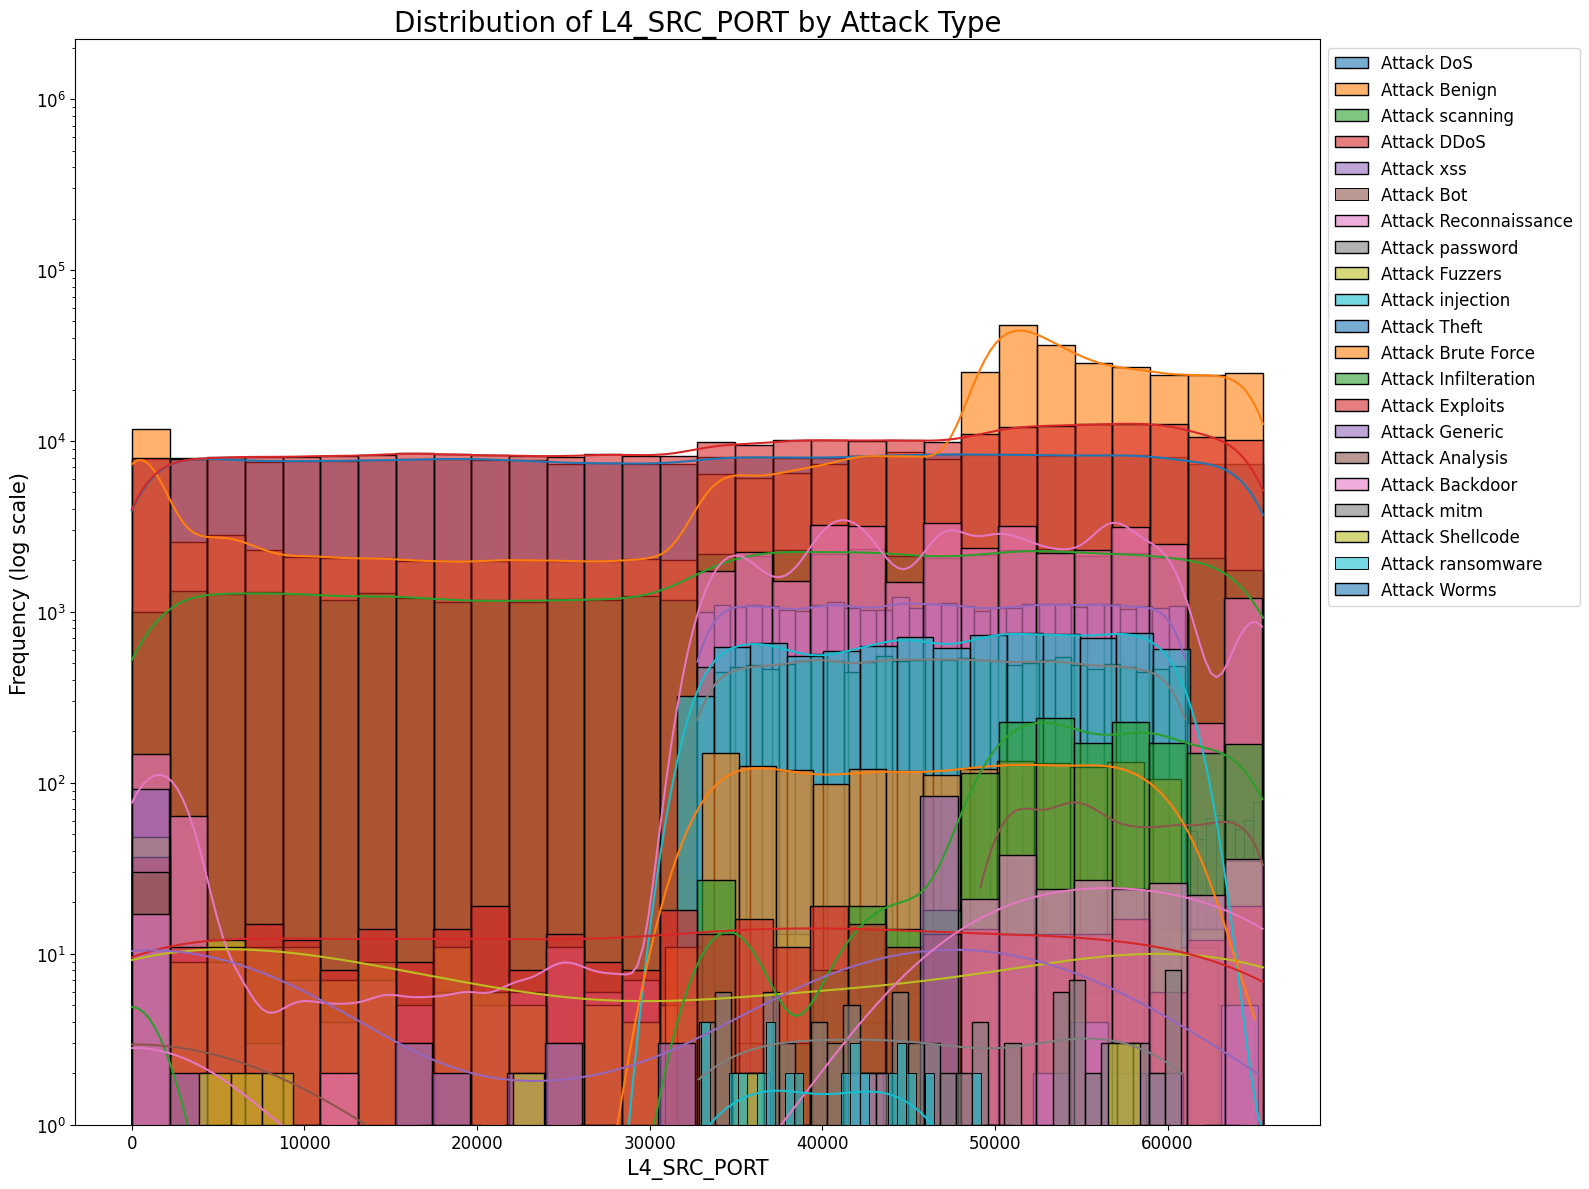

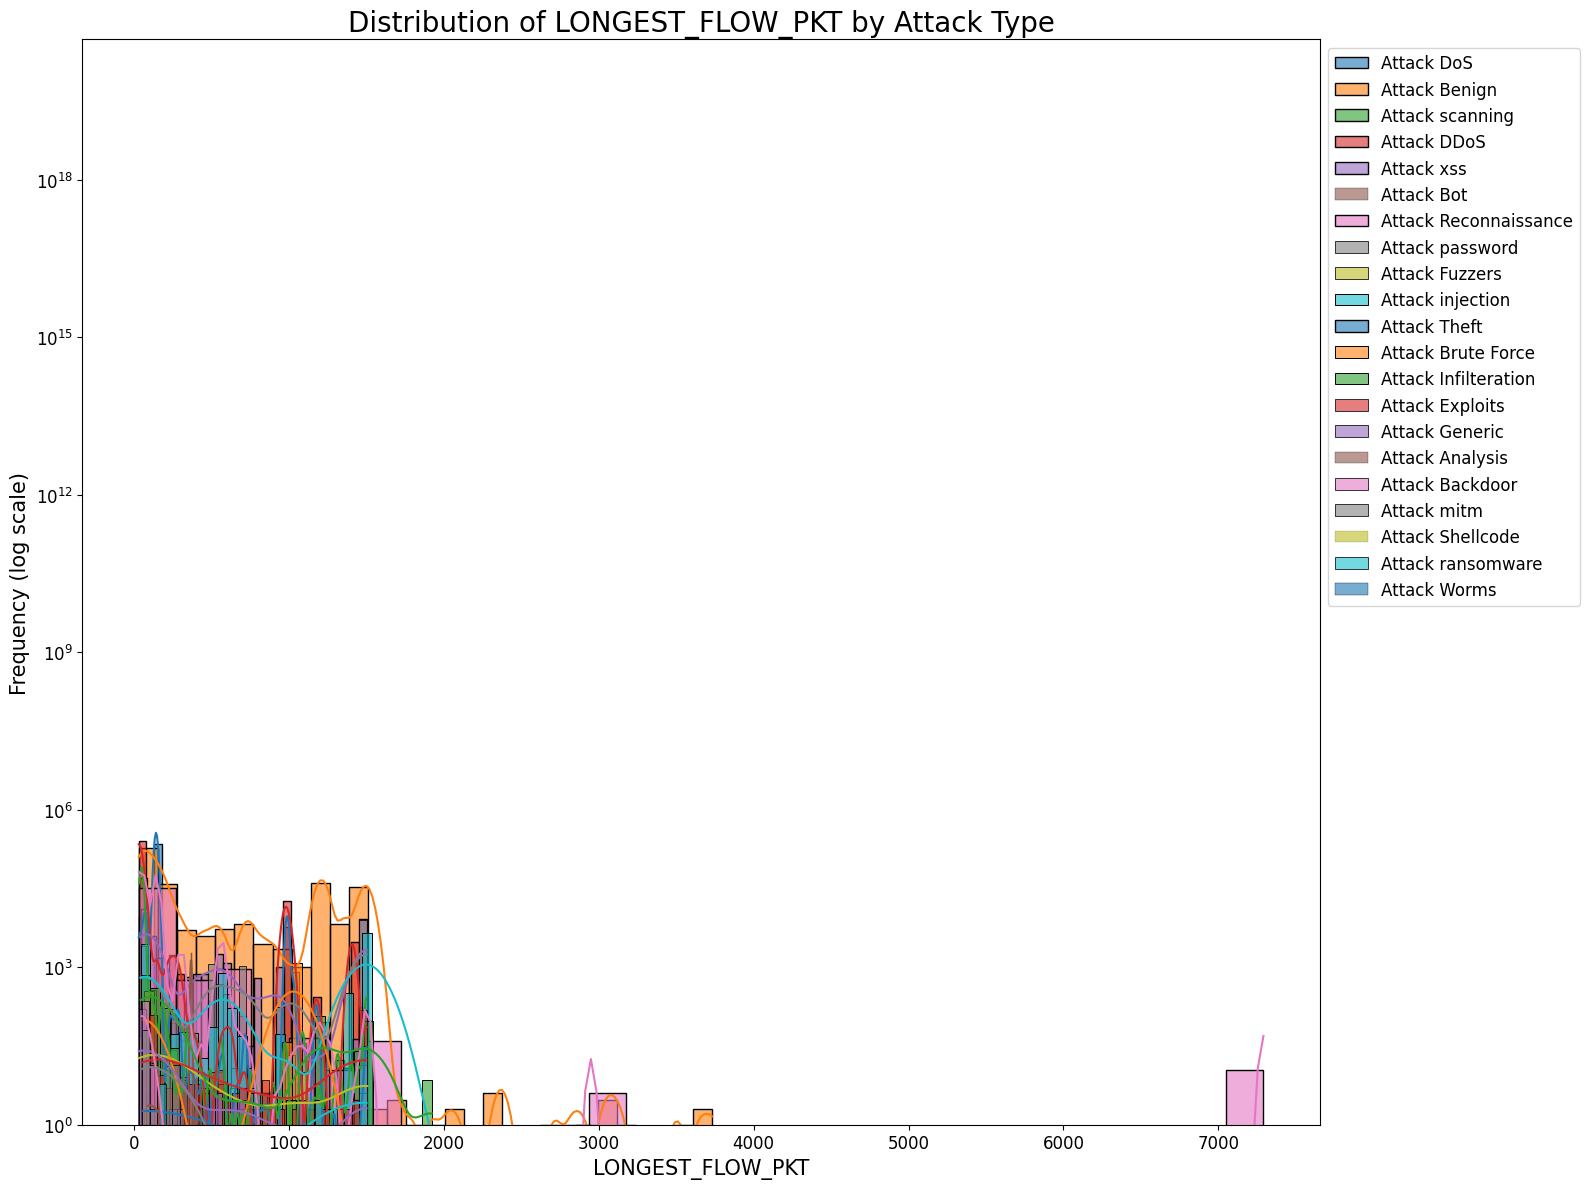

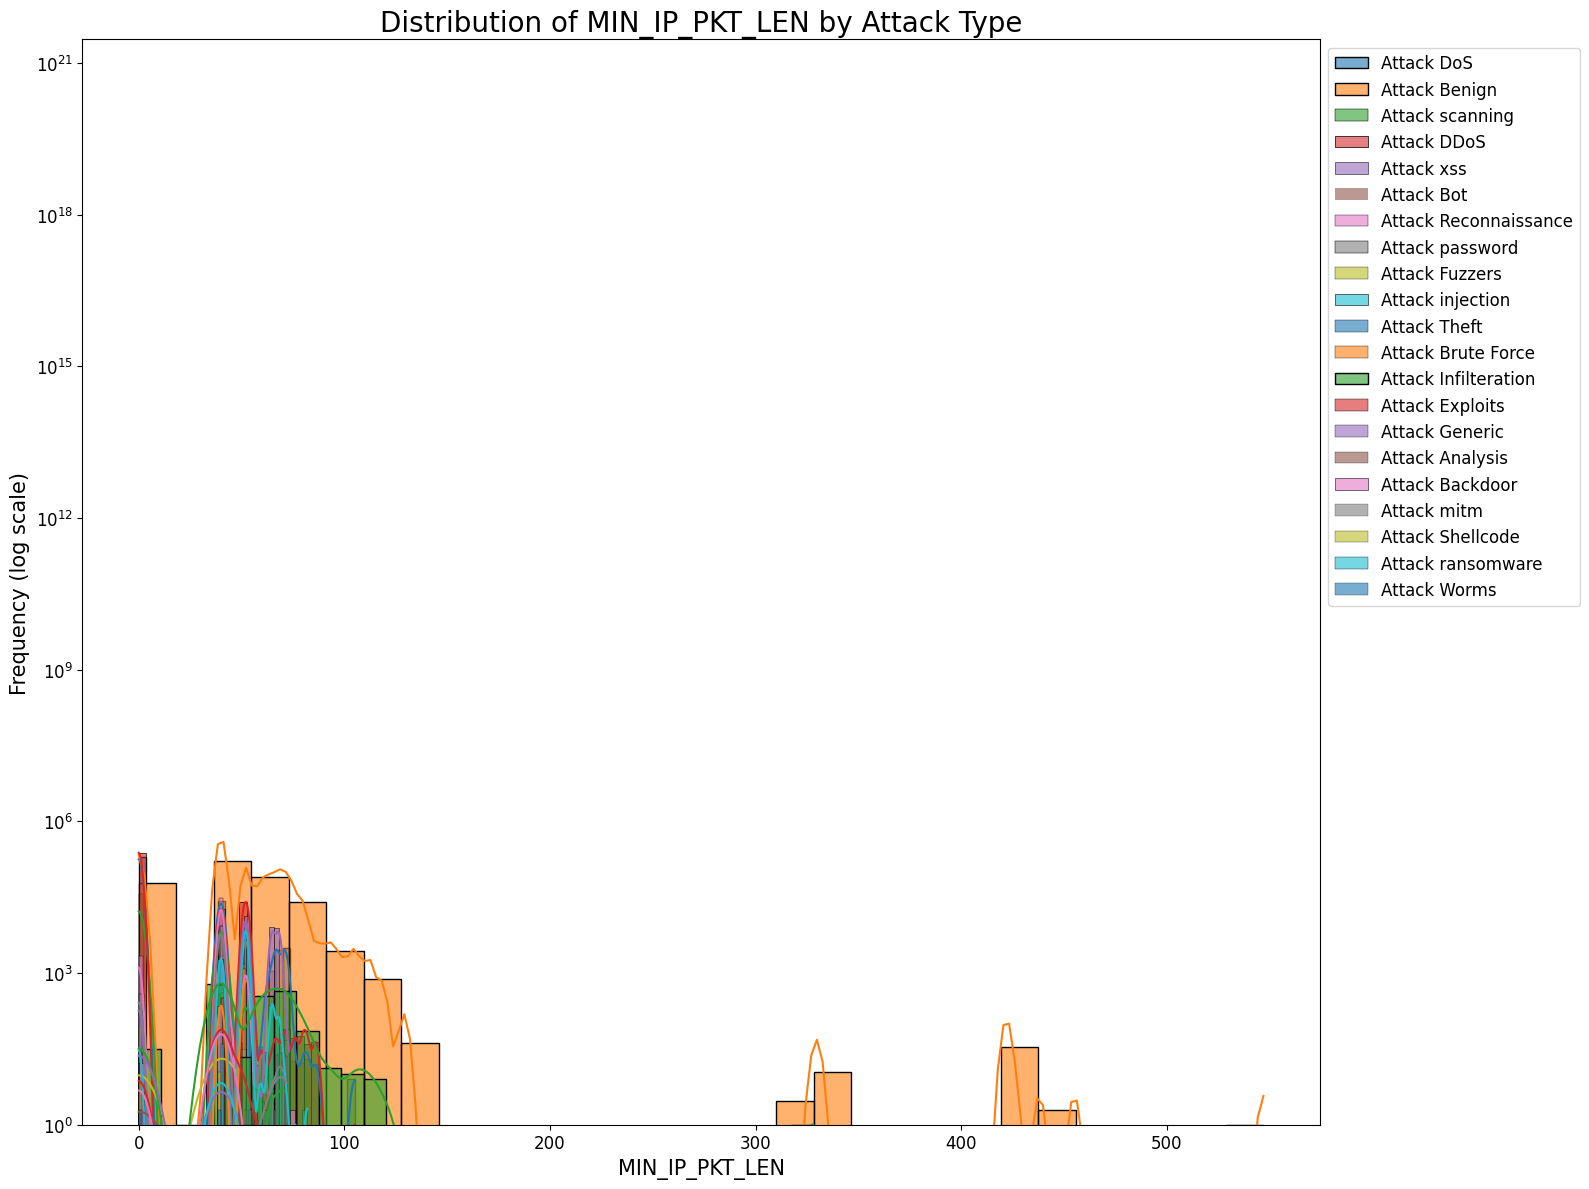

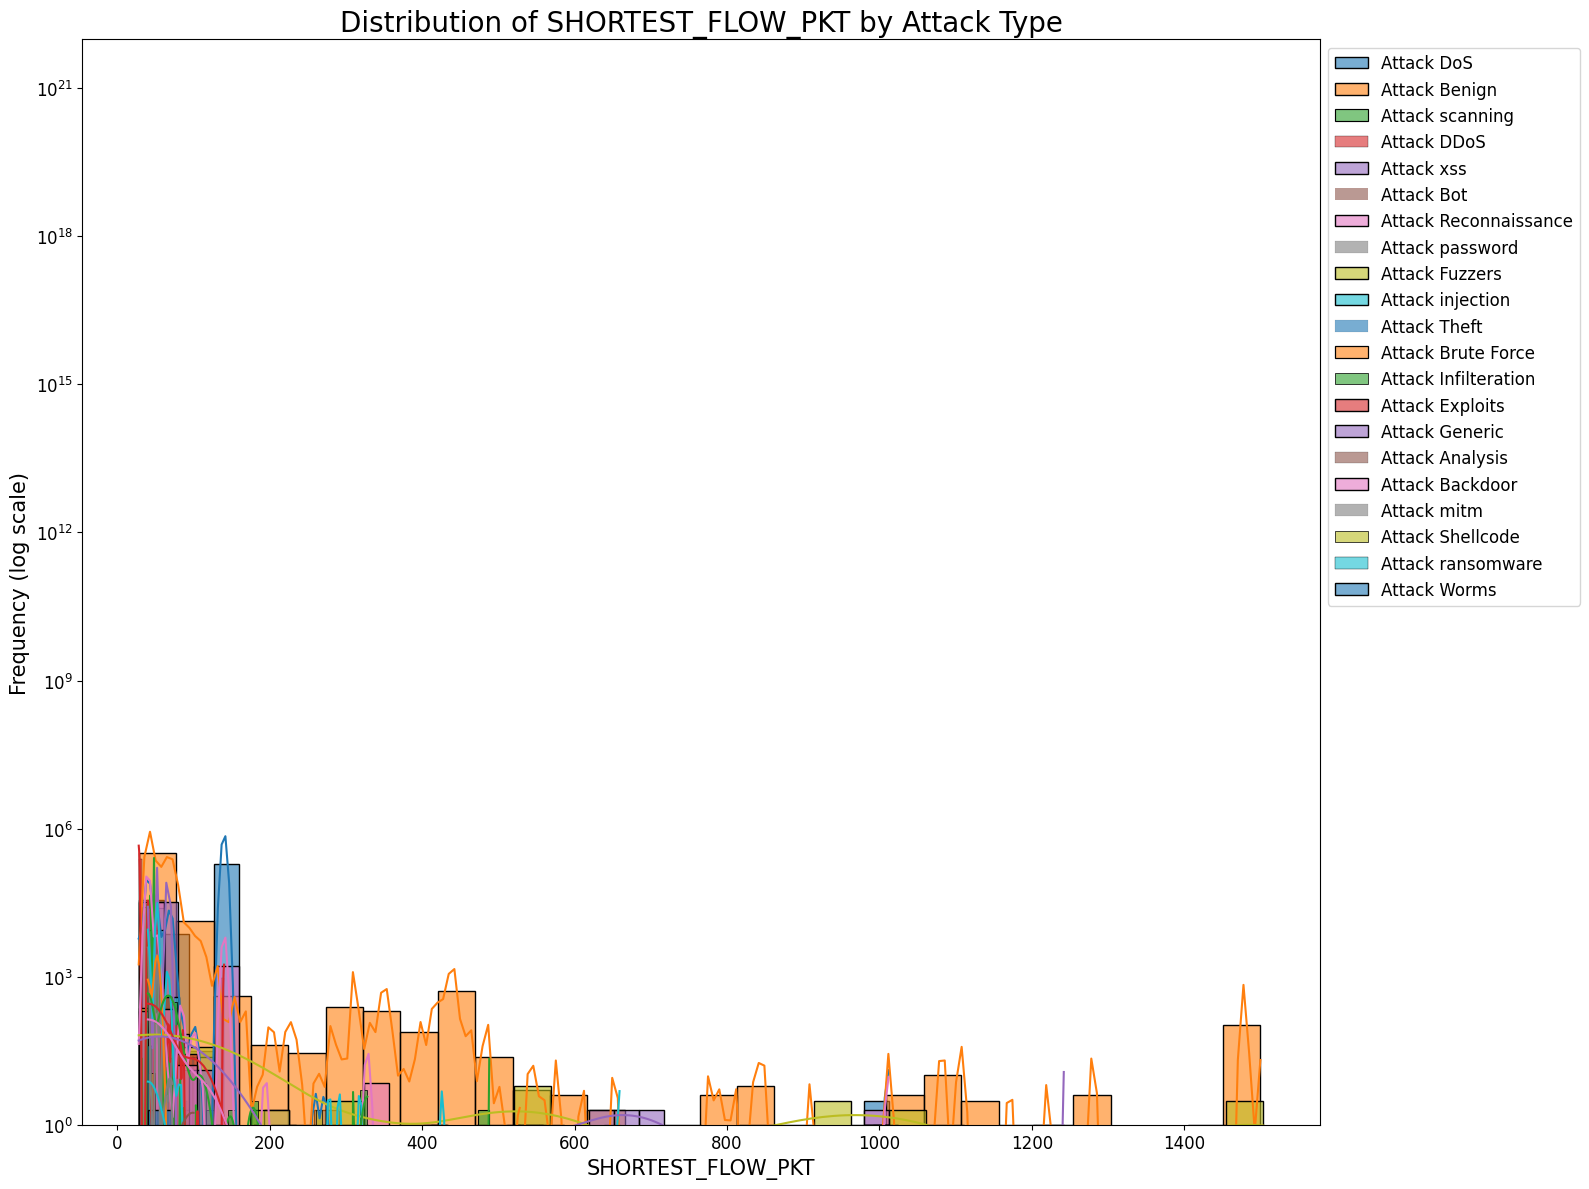

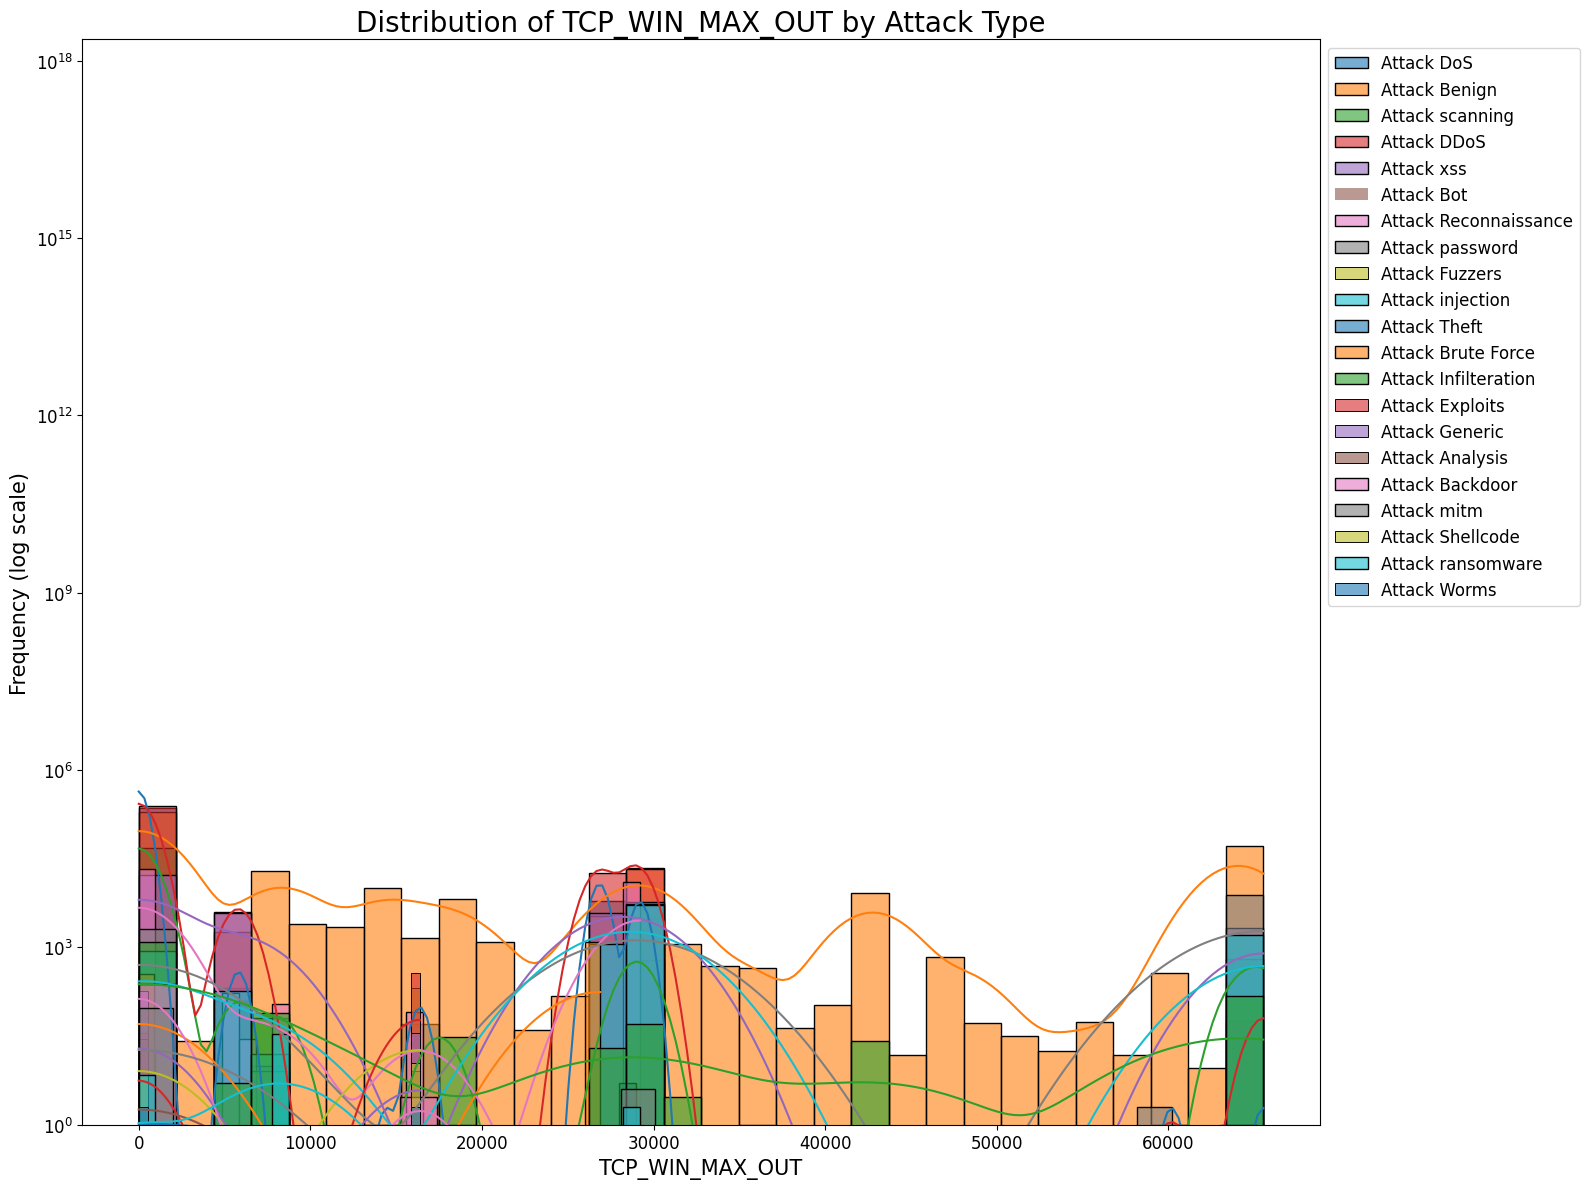

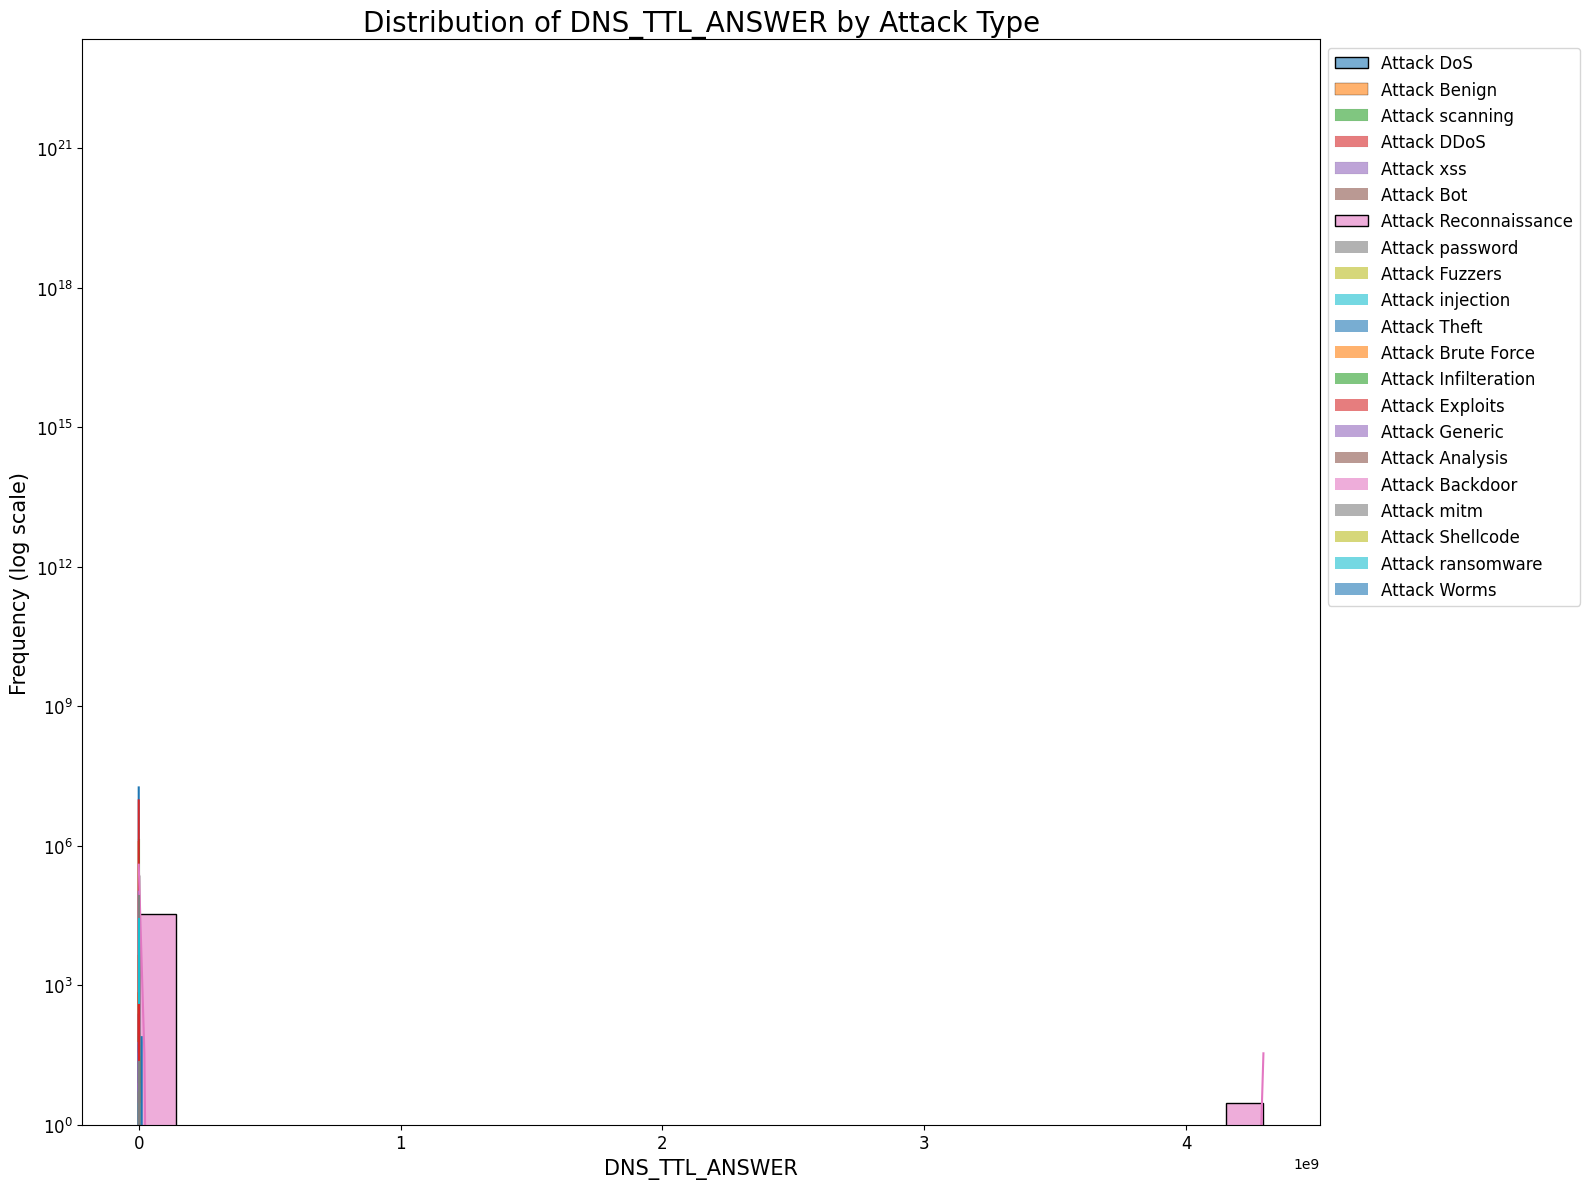

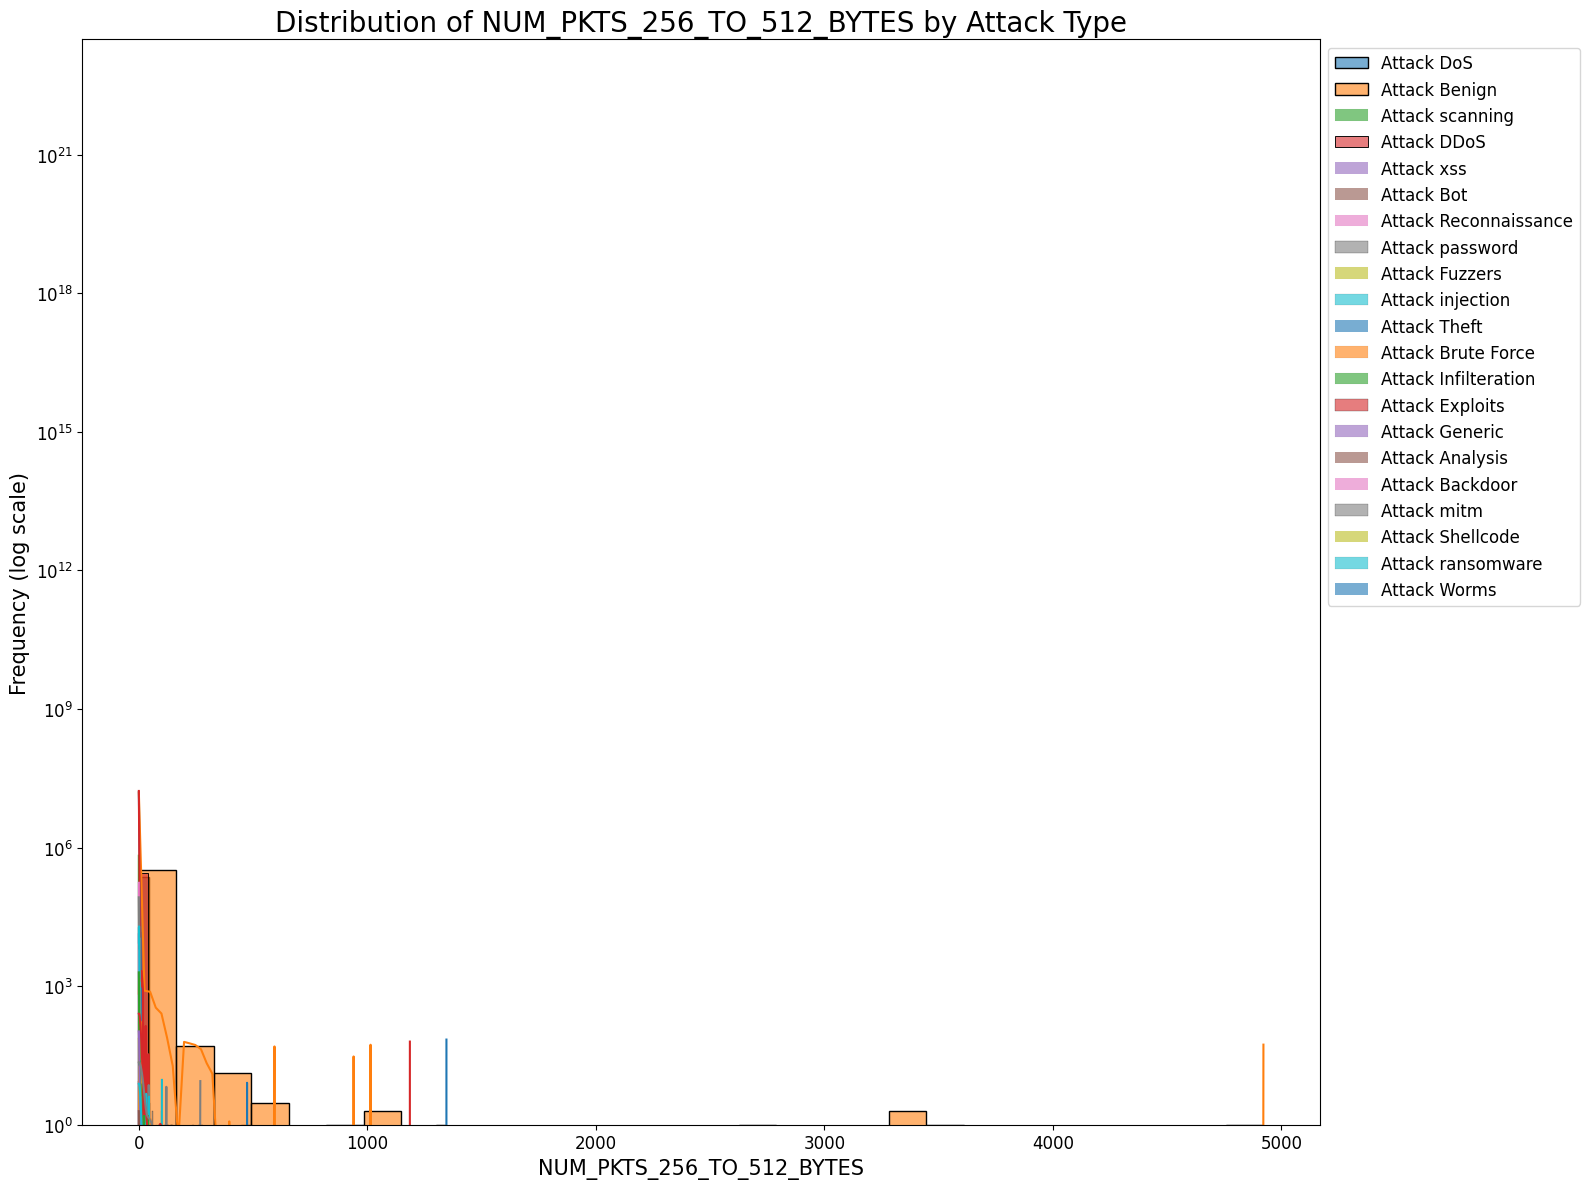

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 중요한 모든 특징을 사용
top_features = important_features

# 각 특징별로 정상 트래픽과 공격 유형별 분포 시각화
for feature in top_features:
    plt.figure(figsize=(16, 12))

    # 각 공격 유형별로 데이터 시각화
    for attack in attack_types:
        data = attack_data[attack][feature]

        # 데이터 필터링 (전체 데이터 사용)
        sns.histplot(data, kde=True, label=f'Attack {attack}', bins=30, alpha=0.6)

    plt.title(f'Distribution of {feature} by Attack Type', fontsize=20)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('Frequency (log scale)', fontsize=15)
    plt.yscale('log')  # y축을 로그 스케일로 설정
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # y축 상한 값 설정으로 여유 공간 추가
    y_max = plt.gca().get_ylim()[1]
    plt.ylim(1, y_max * 1.005)  # 상한 값을 20% 증가시켜 여유 공간 추가

    # 범례를 그래프 밖으로 이동
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.tight_layout()  # 그래프 레이아웃 조정
    plt.show()


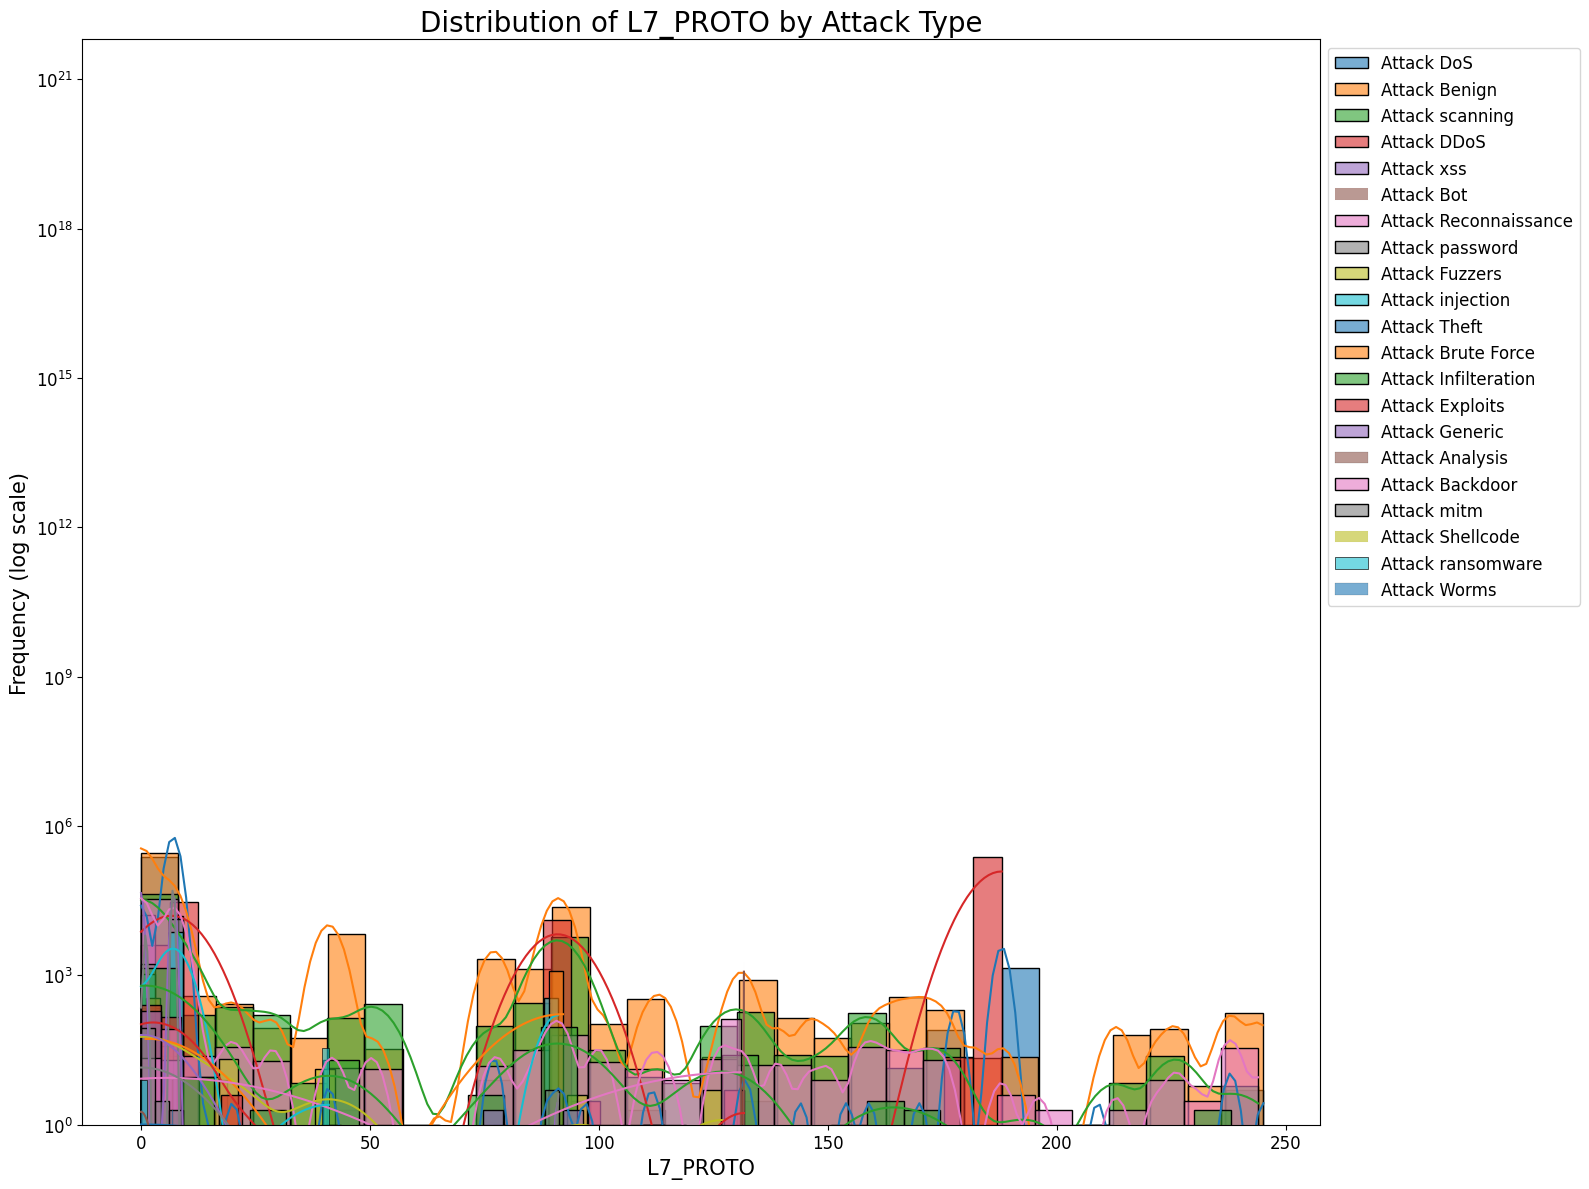

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 중요한 모든 특징을 사용
top_features = important_features[:1]

# 각 특징별로 정상 트래픽과 공격 유형별 분포 시각화
for feature in top_features:
    plt.figure(figsize=(16, 12))

    ax = plt.gca()

    # 각 공격 유형별로 데이터 시각화
    for attack in attack_types:
        data = attack_data[attack][feature]

        # 데이터 필터링 (전체 데이터 사용)
        sns.histplot(data, kde=True, label=f'Attack {attack}', bins=30, alpha=0.6, ax=ax)

    ax.set_title(f'Distribution of {feature} by Attack Type', fontsize=20)
    ax.set_xlabel(feature, fontsize=15)
    ax.set_ylabel('Frequency (log scale)', fontsize=15)
    ax.set_yscale('log')  # y축을 로그 스케일로 설정
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # y축 상한 값 설정으로 여유 공간 추가
    y_max = ax.get_ylim()[1]
    ax.set_ylim(1, y_max * 1.05)  # 상한 값을 5% 증가시켜 여유 공간 추가

    # 범례를 그래프 밖으로 이동
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.tight_layout()  # 그래프 레이아웃 조정
    plt.show()
